In [ ]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset("jonathanli/human-essays-reddit")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/38885 [00:00<?, ? examples/s]

In [ ]:
dataset_test = dataset["train"]

In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
generate_tokenizer = AutoTokenizer.from_pretrained("gpt2")
generate_model = AutoModelForCausalLM.from_pretrained("gpt2")

def generate_text(length,prompt):

  # Tokenize the prompt
  inputs = generate_tokenizer(prompt, return_tensors="pt")

  # Generate text
  output = generate_model.generate(
      inputs.input_ids,
      max_length= min(length,512),  # Adjust the length as needed
      temperature=0.7,  # Adjust the temperature for more or less randomness
      top_k=50,  # Adjust for diversity
      top_p=0.95,  # Adjust for diversity
      do_sample=True,
      num_return_sequences=1  # Number of sequences to generate
  )

  # Decode the generated output
  try:
    generated_text = generate_tokenizer.decode(output[0], skip_special_tokens=True)
  except:
    generated_text = generate_tokenizer.decode(output, skip_special_tokens=True)
  return generated_text

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
length = len(dataset_test['top_comment'][0].replace('\n', '').split())
prompt = dataset_test['title'][0]
print(prompt)
genrated_text= generate_text(length,prompt)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


It is revealed that all imaging of the earth from space has been altered because the true shape had to be censored


In [ ]:
print(genrated_text)

It is revealed that all imaging of the earth from space has been altered because the true shape had to be censored. If you look closely, you will see that the true shape of the Earth is being distorted. All of the imaging of the Earth has been censored. This distortion is due to the fact that the true shape of the earth has been altered because the true shape of the earth has been corrupted. This distortion is due to the fact that the true shape of the earth is being distorted.

To be sure, this distortion is caused by the fact that the Earth was created by the Creator in the Creator's will. But the actual shape of the Earth was not created in the Creator's will.

The Creator created the Earth in the Creator's will. However, the physical reality of the Creator's will is not the physical reality of the Earth. The physical reality of the Creator's will is not the physical reality of the Earth.

In order to correct the distortions of the Earth, the Creator created the Earth in the Creator

In [ ]:
text = dataset_test['top_comment'][0].replace('\n', '')
text

"Jared's lips curled up, baring his teeth'So what did you think of the take-off?'Tom gasped, he hadn't realized he was still holding in his breath. He looked to his right. The lean scrawny face of his senior officer loomed over him.'It was rough to say the least, sir. Fairly exciting too!''I'm glad to hear that you sunofabitch. You're the hope of the academy'Tom grinned. His hands reached to his waists, unbuckling himself from the seats; artificial gravity had been restored. He curled his fingers backwards, then reached to the ceiling. Legs unfurling like the wings of dragon, he stepped up and stretched. His lithe, athletic frame, over 6 feet long, bent backwards and then straightened.He trotted towards the console station. Blinking buttons and flashing lights. He pushed in a few numbers at the input dock and moved on to the loo. Noisy, distinct growls made their way through his taught stomach. Things were gonna get messy.He sprinted to the washrooms. He caught the page, Dwight, just a

In [ ]:
#GPT2 Probabilties
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
#generate_tokenizer = AutoTokenizer.from_pretrained("gpt2")
#generate_model = AutoModelForCausalLM.from_pretrained("gpt2")
##GPT2 swap with llama2
#Research questions:
#Out of domain improvements? English/Spanish/Etc
def GPT_Probabilties(text):


  # Tokenize the premade text
  input_ids = generate_tokenizer(text, return_tensors="pt")["input_ids"]

  # Generate token probabilities
  with torch.no_grad():
      outputs = generate_model(input_ids)
      logits = outputs.logits

  # Get softmax probabilities
  probabilities = logits.softmax(dim=-1)[0]

  # Convert token ids back to tokens
  tokens_probs = []

  # index token probabilities with input_id from token probabiltiies
  for indx,input in enumerate(input_ids):
    tokens_probs.append(probabilities[indx][input])

  return tokens_probs


In [ ]:
def N_Gram_Probabilties(text,n):
  grammies = []
  #n = 2
  worders = text.split()
  for i in range(len(worders)-n-1):
    grammies.append((worders[i:i+n-1],worders[i+n]))

  word_probs = []
  for i in range(len(grammies)):
    num = 0
    den = 0
    for j in range(len(grammies)):
      if grammies[i][0][0] == grammies[j][0][0]:
        den += 1
      if (grammies[i][0][0] == grammies[j][0][0]) and (grammies[i][1] == grammies[j][1]):
        num += 1
    word_probs.append(num/den)
  return word_probs


In [ ]:
#Only doing Bigrams
def Kneser_Ney_Probabilties(text,discount,vocab_size = 51027,use_vocab = True):
  grammies = []
  n = 2
  worders = text.split()
  for i in range(len(worders)-n-1):
    grammies.append((worders[i:i+n-1],worders[i+n]))

  word_probs = []
  discount = 0.75
  for i in range(len(grammies)):
    num = 0
    den = 0
    unique_word_counts = []
    continuation_num = []
    continuation_den = []
    for j in range(len(grammies)):

      #if the W_i-1 of the anchor bigram equals W_i-1 of the compared bigram (second loop)
      if grammies[i][0][0] == grammies[j][0][0]:
        den += 1 #denominator for prob term
        unique_word_counts.append(grammies[j][1])

      #if the anchor bigram equals the compared bigram
      if (grammies[i][0][0] == grammies[j][0][0]) and (grammies[i][1] == grammies[j][1]):
        num += 1 #numerator for prob term

      #if the W_i of the anchor bigram equals W_i of the compared bigram (second loop)
      if (grammies[i][1] == grammies[j][1]):
        continuation_num.append(grammies[j][0][0])


      if (grammies[i][0][0] == grammies[j][0][0]) and (grammies[i][1] != grammies[j][1]):
        continuation_den.append(grammies[j][0][0])

    prob = max(0,num - discount)/den
    unique_words = len(set(unique_word_counts))
    unique_cont_num = len(set(continuation_num))
    unique_cont_den = len(set(continuation_den))
    lambda_ = discount * unique_words / den

    if use_vocab:
      continuation = lambda_*1/vocab_size
    else:
      try:
        continuation = lambda_*unique_cont_num/unique_cont_den
      except:
        continuation = 0
    prob += continuation

    word_probs.append(prob)
  return word_probs

In [ ]:
Kneser_Ney_Probabilties(genrated_text,0.75,use_vocab = True)

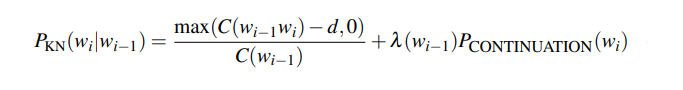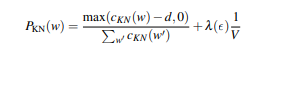

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#A and B are the bigram models C is the GPT

def Feature1(A,B):
  return torch.max(A/B + A)

def Feature2(A,B):
  return torch.var(A/B - A)

def Feature3(A,B,C):
  C = C[:B.shape[0]]
  mask = (A > B) & (B > C)

  merged_tensor = torch.zeros_like(A)

  merged_tensor[mask] = 1

  return torch.mean(merged_tensor)

def Feature4(A,B,C):
  C = C[:B.shape[0]]

  A = A+B

  mask = (A < C)

  merged_tensor = torch.zeros_like(A)

  merged_tensor[mask] = 1

  return torch.mean(merged_tensor)

def Feature5(A,B):
  return torch.var(A*B)

In [ ]:
dataset_test['top_comment'][9]

'Hide was all she said. Angelo did as she said. His mother expected it of him. *Hide.* He crawled under the bed, lifting the loose floorboards gently aside. The guy was already in the house. Angelo had stopped to see who it was. He was a big man in a suit. He smoked a thick cigar and his hands sparkled with gold. *Hide.* He was trying. He dropped into the hole just like before and slowly pulled the boards back into place, all except for one. He held it up and peeked through the crack.\n\nHe couldn\'t hear the man, but his mother was scared. "I wasn\'t feeling good." He heard his mother cry. He didn\'t hear what the man said, but he heard the slap. It sounded like a gunshot to the boys ears. His mother was in the door of the room now.\n\n"Let me make it up to you, Eddie." She begged. He saw his mother\'s dress drop to the floor a moment later. He averted his eyes, but then the man laughed, and he was looking again. His mother staggered back like she\'d been shoved. Her heels tangled in 

In [ ]:
import pandas as pd
df = pd.DataFrame(columns=['Human_AI', 'Feature_1', 'Feature_2', 'Feature_3','Feature_4','Feature_5' ])
for i in range(1000):
  text = dataset_test['top_comment'][i]
  length = len(dataset_test['top_comment'][i].replace('\n', '').split())
  if prompt == dataset_test['title'][i].split() < 5:
    prompt = " ".join(dataset_test['top_comment'][i].split()[:20])
  else:
    prompt = dataset_test['title'][i]
  print('********************************************')
  print(i)
  print(prompt)
  genrated_text = generate_text(length,prompt)
  if len(text.split()) > 420:
    text = " ".join(text.split()[:400])

  Human_GPT = GPT_Probabilties(text)[0]
  Human_KN = torch.tensor(Kneser_Ney_Probabilties(text,0.75,use_vocab = True))
  Human_NG = torch.tensor(N_Gram_Probabilties(text,2))
  print('------------------------Human:\n',text)
  print('------------------------Generated:\n',genrated_text)
  Generated_GPT = GPT_Probabilties(genrated_text)[0]
  Generated_KN = torch.tensor(Kneser_Ney_Probabilties(genrated_text,0.75,use_vocab = True))
  Generated_NG = torch.tensor(N_Gram_Probabilties(genrated_text,2))
  human_feat1 = Feature1(Human_KN,Human_NG)
  human_feat2 = Feature2(Human_KN,Human_NG)
  human_feat3 = Feature3(Human_KN,Human_NG,Human_GPT)
  human_feat4 = Feature4(Human_KN,Human_NG,Human_GPT)
  human_feat5 = Feature5(Human_KN,Human_NG)

  generated_feat1 = Feature1(Generated_KN,Generated_NG)
  generated_feat2 = Feature2(Generated_KN,Generated_NG)
  generated_feat3 = Feature3(Generated_KN,Generated_NG,Generated_GPT)
  generated_feat4 = Feature4(Generated_KN,Generated_NG,Generated_GPT)
  generated_feat5 = Feature5(Generated_KN,Generated_NG)

  df.loc[len(df)] = [0,human_feat1,human_feat2,human_feat3,human_feat4,human_feat5]
  df.loc[len(df)] = [1,generated_feat1,generated_feat2,generated_feat3,generated_feat4,generated_feat5]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
0
It is revealed that all imaging of the earth from space has been altered because the true shape had to be censored
------------------------Human:
 Jared's lips curled up, baring his teeth 'So what did you think of the take-off?' Tom gasped, he hadn't realized he was still holding in his breath. He looked to his right. The lean scrawny face of his senior officer loomed over him. 'It was rough to say the least, sir. Fairly exciting too!' 'I'm glad to hear that you sunofabitch. You're the hope of the academy' Tom grinned. His hands reached to his waists, unbuckling himself from the seats; artificial gravity had been restored. He curled his fingers backwards, then reached to the ceiling. Legs unfurling like the wings of dragon, he stepped up and stretched. His lithe, athletic frame, over 6 feet long, bent backwards and then straightened. He trotted towards the console station. Blinking buttons and flashing lights. He pushed in a few numbers at

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
1
An immortal enlists in the army.
------------------------Human:
 War has changed so much since my first fight. Heck, the world period has changed. When I first took up arms it was to defend my first, and now long dead family. I was cursed by a Sumerian witch to live like this. Through the years I've been staked in the heart, beheaded, lopped in half, shot, blown up, shot down, and bayoneted. I've fought in armies in every major war it seems. I've lost faith in religion. I've fallen in and out of love. But the armies of the world have been my home for centuries. Whether it be laying siege to Rome, or serving in it legions Ive always fought. Ive seen man go from stabbing each other with sticks to dropping atomic bombs. I've flown bombers, fighters. Driven tanks. Dug trenches. Slogged through the mud and the blood in the Somme. Drug my comrades from the snow as the Russian air force bombed our Finnish ranks. I've surrendered to Yankees. To Br

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
2
The secret to immorality is killing a newborn child. What is the world like?
------------------------Human:
 Pro-lifers don't like it. Almost no-one likes it. But people have done it. You know who's done it. On your street, in your school, in your workplace. Even some celebrities. We're not pointing fingers but both Kim Kardashian and Putin have the same guilty sheen of eternal youth. There's the news that some poor kidnapped girl was kept in a cellar for ten years and forced to give birth to children who'd live three hours before her captor sold their lives for a hundred grand. Eleven children. Eleven men. They got life sentences. That made people laugh. Funny what makes you laugh when things are this awful. 


Abortion isn't really discussed any more. No-one cares when some junky mother sells her child's life so someone else can live forever. She was going to get rid of it anyway. You care, though, when you come home and find your husban

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
3
Science proves that the universe is a computer simulation. Five years on, what's happened?
------------------------Human:
 If you ask the masses today of what a team achieved at CERN in 2016 that changed their life, they will stare blankly and ask what you mean. Some of their eyes will flicker while doing it and some with ignore the question. I mean how would you react if someone asked you what your feelings were about an event that was yet to happen, for as far as you know its 2014 and 2016 is still 2 years ago. So why I am writing this, why am I pushing a question that no one can know the answer too, and more importantly why are you reading this. Its the nag. That noise at the back of your mind that causes your eyes to flicker, the noise that makes you walk past me when I ask that question, the confusion you feel at the date 2016 is not some foreshadow of whats to come, you are no prophet. What you are is a survivor. This is going to sou

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
4
After a failed invasion of earth, an alien begs for mercy from a human soldier
------------------------Human:
 Edit: Forgot to mention that I tried to model this off of Mordin Solus, from Mass Effect. Similar speech and thinking. Hope you enjoy. _____________________________________________________________________________ Resistance was unanticipated. The ships encountered at First Contact were rudimentary. Humans have advanced quickly. Far more advanced than before. Modeled after own ships perhaps. Should have learned more. Assumed a quick victory. Loss after loss, very unpopular. Low morale remaining. One last shot. Must destroy headquarters. Must destroy Houston. Large force, they knew attack was coming. Must protect capital ship. Must complete bombing run. Sky is no longer blue. Filled with red plasma. Many explosions, many friends dead. Can see headquarters, too close to fail. Scientists shouldn't be fighter pilots. Terrible idea. Not

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
5
Breaking a Promise is Punishable By Death
------------------------Human:
 The man sat in front of me, his desperation was clear in his face. I gave my secretary a quick glance, her silent nod confirming my suspicion. He was the usual sort of customer.

The irresponsible type, often a parent, who had made a rash promise to their child. Children are often the death of us these days.

"I-um," He began.

"Stop," I said, "Listen, I want to help you. I truly do. But the fact of the matter is, you're a dead man."

"She was my daughter! On her death bed! For crying out loud do you have any compassion?" He said. Tears had begun streaming down his face. "This is your job isn't it? You, you help people right?"

"I'm an agent of law and the law is binding." I said, "Sometimes I can convince the magistrates to see differently. Convince them that no promise was truly broken. But when it comes to children they are very strict."

"All I did," he said, "wa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
6
ur first interstellar ship exits the solar system, only to be confronted by a border-guard (more inside)
------------------------Human:
 The I.S.V. Amundsen was not built for warfare. It was a small colony ship, barely holding 600 souls in all. So when the alien vessel caught the ship with a barrage of ion cannons, there was nothing to be done. In retrospect, there was no way we could have translated their warnings. Radio messages of peace from us were ignored. They could not understand us either. There was a failure to communicate as the old joke goes. So they boarded us, what few weapons on hand we used in trying to repel them. It was all futile of course. It was Lieutenant Mueller who first gave them a human name. Vogel. He would die about three minutes later. I still use it. They only attacked those armed and the non-combatants were ignored. Unfortunately, that bastard of a XO started a manual self destruct sequence. The aliens evacuat

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
7
Elvis, John Lennon, and Tupac are enjoying a pleasant day on the beach on the private island they retired to after faking their deaths, when a stranger washes ashore from a shipwreck.
------------------------Human:
 "B-b-b...But why!?!"

The three men stared at their newly arrived guest as if he'd grown a second head. Kurt stared back, just as confused. In front of him were legends, *living* legends, he supposed. That old joke turned out to be true, and all of the famous people who up and died really were just relaxing on a beach in the middle of no where. He couldn't understand it.

"What could be worth giving up your entire lives for?"

John spoke first 

"What were any of us really living for? Careers begin and end the same way, with no one knowing your name. I know that I chose to end my career a martyr. I took my exit early, but it will be a very long time before someone forgets my name.

Elvis spoke after him

"I wasn't even in my pr

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
8
Write a story that features someone breaking the heart of someone they love for the betterment of both (or just one) of them.
------------------------Human:
 "I don't know what else to say."  I said with shrugged shoulders and a blank look over my face like a mask.  "Keep your mask on.  You must sell this."  I told myself over and over again.  It was becoming seemingly impossible as she screamed at me with a pointed finger.  "How can you just not love me anymore?  Is there someone else?  Why?"  Inside I felt like dying right this very instant, but that would come later.



Stage IV cancer was my diagnosis.  I had been giving 6 months to a year to live.  I had made my decision a week ago while twirling an engagement ring that would never be given between my fingers.  "It will be better if she hates me and moves on than if she suffers with me."
------------------------Generated:
 Write a story that features someone breaking the heart of some

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
9
"Hide."
------------------------Human:
 Hide was all she said. Angelo did as she said. His mother expected it of him. *Hide.* He crawled under the bed, lifting the loose floorboards gently aside. The guy was already in the house. Angelo had stopped to see who it was. He was a big man in a suit. He smoked a thick cigar and his hands sparkled with gold. *Hide.* He was trying. He dropped into the hole just like before and slowly pulled the boards back into place, all except for one. He held it up and peeked through the crack. He couldn't hear the man, but his mother was scared. "I wasn't feeling good." He heard his mother cry. He didn't hear what the man said, but he heard the slap. It sounded like a gunshot to the boys ears. His mother was in the door of the room now. "Let me make it up to you, Eddie." She begged. He saw his mother's dress drop to the floor a moment later. He averted his eyes, but then the man laughed, and he was looking aga

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
10
a recently deceased person argues the concept of heaven to an angel
------------------------Human:
 *Chapter One* ...Ted awakens to nothingness. It is neither black nor white. It is impossible to describe in any words yet invented. It is like a broken record that will go on for all eternity. A rolodex of moments that is caught in a loop. The angel appears out of thin air, "welcome to heaven." "Th..This is heaven? Theres nothing here..." "Oh, sure there is! There's everything! Just ask for something!" "Is this a test? If it is, I am being honest right now and saying I am going to ask for things not condoned in the Bible. Shouldn't that honesty be a good thing? You know I don't want to mess with you guys..." "It's no test. Ask for something!" "Can I see my grandmother? She HAS to be up here, sweet old lady..." "Sure! And you're a sweet guy! Do you have any idea how many men ask for all kinds of messed up things right away!?" Do they get wha

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
11
You're sitting on a chair, looking in the eye of the killer who is going to kill you in 20 seconds.
------------------------Human:
 Sometimes you just know when you are at the end of the road. I didn’t ask for this, but now it is my reality. When I was a kid I never in a million years dreamed it would end like this. You have a warped sense of death and old age as a kid. Hell, when it is June Christmas seems to take forever to arrive so the idea of turning 40 or 50 is as foreign as Mars of Denver. I had always assumed I would live as long as my grandparents.

Now staring into his eyes I knew I would never see 50. My thirties were actually a lot of fun. I drank, partied, and had a good job. I dated some great women and made some lasting memories. My forties have bogged down in a marsh of health issues, debt, and other problems. Still, I had always envisioned something great for myself. I had always thought that I would do something meaningf

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
12
A newly enlisted, seventeen year old private is one of the first people into Iraq in 2003. Explain how he changes and where he is at now.
------------------------Human:
 Everyone wants to be a hero. That's how they sold it to us, anyway. 


The first thing that hits you is the heat. Like a brick wall to the face. Like a freight train to the lungs. Knocks the air out and when you breathe back in, it's like the oxygen's on fire. The second thing that hits you is the smell. I heard Baghdad was a cosmopolitan city before we came. After that it was like an open sewer. Blood and shit runs in the streets in equal measure but the strongest smell of all is the fear. People sweat it, here. 



I'd kissed Casey goodbye at the end of winter. Highschool sweetheart. We'd had maths together before I dropped out. I'd stare at the side of her face from my seat. The way her freckles danced across the bridge of her nose. Or the way she swished her hair when

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
13
A soldiers kills their commanding officer to save their country.
------------------------Human:
 My love,

If you're reading this, then I have died by your hands. This was necessary in order to ensure your safety. A few months ago I discovered both of our names were on the Blacklist. It was only a matter of time before they discovered your connections, and only a few days before they discovered mine. That was why I had to desert and join with the freedom fighters. However, this country will not change because of their actions; they are too fragmented, and cannot muster the resources before the military crushes them.

This I knew intimately well.

With my death by your hands, you are now beyond reproach, your loyalty demonstrated. They will seek to make you an example of a true soldier who loves her country above all. Truly, you might also get access to the Inner Sanctum of the Doctrinal Correction Council.

All the important men and women

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
14
"I'm sorry, but the thing you were looking for is sold out."
------------------------Human:
 "I'm sorry, sir, but this property has already been bought"

"What? That can't be right. I saw this property was for sale two days ago!"

"No sir, that would be the one down the street. They do look very similar."

"Bullshit. I drove past this house before and it clearly stated "FOR SALE: $180"

"It was a first-come-first-serve deal, sir. Someone came just before you did"

"Oh for goodness sake then. Who bought Bow Street then?"

"She did, sir" and the banker pointed to the lady next to me, holding up the card for Bow Street and smiling.

"$58, if you please."
------------------------Generated:
 "I'm sorry, but the thing you were looking for is sold out."

"Aww, you're so cute."

She sighed, and said, "I'm sorry. I'm not sure how to deal with you. But I'm sure you can deal with me. I'll see you at the beach, and I'll give you the best meal I can, 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
15
First people on Mars discover buried ruins of ancient Martian civilization.
------------------------Human:
 "Sarah?"

She was over in the distance, standing completely still. The sky was pink and hazy, and the silhouette of Sarah's spacesuit stood on the horizon. Commander Jason Green, along with Sarah, was making history as the first people on the planet Mars. Sarah had a dangerous habit of wandering. 
Green began to approach her. He treaded towards the hilltop, unnerved by the silence on the radio. 

"Come in, Sarah."

There was a short pause, and then Green heard Sarah's voice over the radio.  

"You... you have to see this." 

The Commander caught up with Sarah, and stood beside her, looking over the rolling hills ahead. The two stood there in silence gazing at the object in front of them. 

"It's a car. Wow."

The ancient, rusted behemoth's headlights stared back at the two astronauts through curtains of red sand. 

Sarah pointed out

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
16
Grim reaper job application aptitude test.
------------------------Human:
 1.) Have you ever knowingly or unknowingly killed a man?


*What?*


I'm a broke college student. I'm trying to make some money with a temp job over the summer and I downloaded this application form off some sketchy site online. The first question, has me stumped. Maybe it's a new type of criminal records check? Kind of specific... And how would I know if I've *unknowingly* killed a man? Isn't that the whole point? 


I move onto the next question. 


2.) How do you feel about wearing black on a daily basis? 



Well... I know some offices have a dresscode. I'm not about to lose out on a potential job because I'm fussy about my colour choices. So what if black washes me out? At least it'll go with my sense of humour. 



3.) Describe how you feel about John Stuart Mill's philosophy of utilitarianism in under 666 words. 



That one has me stumped for as long as it 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
17
Your IQ doubled overnight. Internal monologue and social media posts to follow.
------------------------Human:
 John wakes up. Sleepy, as usual. An hour of sleep does that to a man. Standing up, he looks at his reflection in the mirror propped against his dresser, as usual. He quietly comments to himself on his weight loss, and as his eyes trail upwards, he realizes he has to shave. John shaves every three days. As usual.


His eyes keep moving up, up until his eyes meet his own. He stares for one, two, three... This is not usual. 


"John, dear. Are you alright?" John's wife asks, groggy. She didn't sleep much either. 


"I...uh...I..um...get me my phone."


"Why, sweetie?" 


No response, but she gets him his phone nonetheless.


John's wife watches as John types frantically, with more passion than she's ever seen him have. 


He looks up after he finishes. Triumphant. His eyes glimmer just a little, but it's a lot more glimmer than the

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
18
Why did you hit our elderly neighbor with a cantaloupe?
------------------------Human:
 Oh my god, seriously? What did he do, email you? I swear, I'm this close to calling health &amp; human services on the guy. Listen June, I know you sorta like the guy and feel sorry for him, but you don't know the half of it. I've refrained from telling you some things because I didn't want to freak you out, but the guy's a creep. And I really think he could be unstable. Yeah, I know he's old and infirm and doesn't have anyone. But he's not the nice old guy you think he is. Some of the things I haven't told you: -- Do you remember last year when Buster was sick and we had to take him to the vet? They couldn't tell us what the problem was, remember? Well, I found some bones and raw meat under the hedge that runs along the side yard, and I firmly believe he tried to poison the dog (if you'll recall, he had complained to you -- very politely -- a few mont

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
19
And that is why I will wake up tomorrow, no matter what I feel , I will go out and run.
------------------------Human:
 My legs ache. I’ve been at this for two months and it’s getting harder, not easier. Fifteen miles today, I need to do 20 by next week to qualify by September. I think my shins will burst into flames if I run anymore but I can’t stop now. All my friends, or what’s left of them, think I’ve lost it but I haven’t, not yet. I need to show them we’re not who they think we are, we're better than that. I run to escape my past and embrace my future. I run because of what has been done and what needs to be done. I run for faith, for humanity, for love. I run because I hate my brothers more than anyone in spite of how much I will always love them. I run because I have to, because I don’t know any other way to make things right. I run because on April 15 my brothers killed 3 people and maimed countless others. I can never undo what 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
20
A 35 year old man/woman still believes in and talks to his childhood imaginary friend, but tries to hide it from his family and friends.
------------------------Human:
 "Why are you masturbating again?" Guntiger asks. I flip in the chair and fumble with my pants, belt buckle clattering on the floor. "Goddamn it, Guntiger, I told you to leave me alone when I'm on the computer." "I can't pick when I show up," Guntiger says. He sheepishly scratches his two double barrel shotgun arms together, the metal scrapes and slides. "Between you and Kath and the kids I don't get any alone time." "I'm sorry, man, but like said, I just show up whenever, and you seem to be masturbating a lot. How do you think I feel? I don't want to materialize in front of you while you're jackhammering yourself, it's really fucking awkward." I minimize the window and grumble to show my discontent. Guntiger leans in, studying the computer. His yellow fangs protrude from h

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
21
You have 2 lives, one in the virtual world and one in the real world. You are facing a decision of having to decide which one of the two you get to keep.
------------------------Human:
 I stood at the top of High Hrothgar and peered over the sheer mountain-face to the ground far below. I could see all the way to Ivarstead below, at the foot of the mountain. Night was falling, and the faint glow of hearth-fires warmed the little village. I heard a heavy thump behind me and felt my back sprayed with snow.

"I respect your decision, Dovahkiin, but it gives me great sorrow." Paarthurnax's rumbling voice was filled, for the first time that I knew of, with a tangible sadness. I could feel the warmth of his breath on the back of my neck. "You have done Keizaal - indeed, all of Taazokaan - a great service, and I wish it did not have to end this way. You have broken the power of the World Eater himself! I only desire to see you accomplish greater 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
22
nd survived and all it cost us was our humanity. [WP]
------------------------Human:
 "Papa" the little girl stumbled up to her white-haired grandfather. "Papa why do we have to go?"

He smiled, brushing the hair back from her tear-streaked face. "We've been chosen for a great task my dear."

She sniffed, looking up at the old man's tanned and wind-worn face framed by a bushy beard she liked to dig her fingers in. She reached for it, and the sky flashed white as the world erupted into a crashing roar. She thought she screamed as she launched herself into her grandfather's strong, comforting arms, but she could hear nothing. She trembled as a hand stroked her hair.

"Here Shem, take her. It's time to go." She could feel herself being handed off, but she kept her eyes shut tight, still shaking.

"What about the rest of the village?"

"Get in."

"Surely there's time to warn them, there's plenty of room..."

"NO! THEY ARE NOT WORTHY." The lit

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
23
You're breaking up with the perfect SO.
------------------------Human:
 I stood at the front door with a heavy heart. 

I knew the minute I walked in, she would come running out with the big welcome home charade. Imogen was always like that, so caring, so loyal, but deep down I knew we can not be together and I'm so afraid of hurting her. 

The door opened and Imogen stepped out to greet me; however, this time she smiled at me with a sad quaintness instead of her usual jitterness. 

"I love you," She told me, like many times before. 

I walked past her without comment and headed towards the kitchen. Imogen quickly skipped behind me and wrapped her arms behind my waist, "What do you want for dinner, George?" She asked. 

"You can't cook," I said dryly. 

"I can cook a bit now" She said smiling, "I learned from the computer." 

"You can't cook" I repeated. 

Imogen's lips curled with slight disappointment before she once again sprang up wit

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
24
When young boys are called off to war.
------------------------Human:
 We stand in a line.  Young people, all bright and shining.  Little futures all in a row.  When we step into that truck our lights go out.  Whether our bodies come back or not, no one returns from this war.  Futures snuffed out.

Why us, why this time, why this time, why this place?  Not for us to ask anymore.  We don't get to be historians and scholars, angry journalists or protesters on the street.  No options any more.

I choose to believe our lights go out when we enter that truck, rather than clinging to the belief that some do that hope exits for our futures after the war.  Who wants their light to gutter out in some lonely field, or come back indelibly marred and twisted?  No, however it happens, this is the end of us.

I can almost see the could-have-been me standing in front of me.  An ageless illusion I have to say goodbye to.  In just a few minutes we will al

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
25
Aliens plead with the government to have their existence exposed to the public. Government says no again.
------------------------Human:
 "Seriously, Ted, come on!"

I push my glasses back up my nose and repeat my answer. "Sorry, Gerboloxicashitayvius-kkpul. We just can't authorize public exposure at this time. Also, my name is Steve."

"Sorry, *Steve*." Said Gerby "Your name's are ridiculous! Why can't we let the people of your world know? Huh? Why, Paul, why? Give me a reason!"

"Well, Gerboloxicashitayvius-kkpul, your race has been kidnapping and probing people for a couple years now-"

"Sure have, Bob!"

"Which is something we've always known about-"

"Yep, since we crashed that one time - thanks for the help by the way!"

"You're welcome. So, the problem is that we would have to explain that we have *known* about you, that we have *known* about the probing, and that we didn't do *anything* about it."

Gerby seemed confused.

"Our peo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
26
Someone whose job is to prepare last meals of criminals on death row has to prepare his own last meal.
------------------------Human:
 You never get used to the death part.

Sure, you get used to the smell.  You get used to them quietly accepting their meal.  You get used to them asking you to stay a while – to chat.  About life, ironically enough.  You get used to them asking for the most extravagant things, a final Fuck You to the universe.

But you never get used to the death.

It eats at you, every day.  Every single vegetable you cut, every single piece of meat you throw onto the hotplate, every stir of the pot – it eats at you.  I’m the third cook this year, I’ve been told.  The officers all laugh about it, as though it’s weak to be concerned about whether another human lives or dies.  That’s fine for them – they don’t get greeted with death day in, day out.  Their entire role isn’t to prepare meals for those that are about to be gr

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
27
Humans are what we think of as demons, the keepers and caretakers of hell. Plants and animals are the sinners forced to live here in punishment.
------------------------Human:
 My sister's children were turned to blood wine.

We breed.  We make love.  We birth.  And we die again.

And again.

And again.

We die so much.  There is always something to eat us.

Fully 2/9ths of us suffer deaths at the hands of the same species.  The rest of us, dozens upon dozens of lesser species.  Eaten outright, plunged into acids and bases we were not built to handle.  Dissolved from the inside out by a vicious invader.  Sometimes our own anatomy is turned against us.  Sometimes this world, this giver of life, just decides to hurt us.  From my rare moments of lucidity, I'm almost certain the latest time of hurting has been the fault of the same species that consumes us with a greater fervor than any other.

I shouldn't have chosen this particular philosop

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
28
The orphaned blacksmith's son-turned-hero-in-training meets an untimely end
------------------------Human:
 "Oi Grushnak, how come you always get the soft giblets? They're nice, they are." "'cause I'm very per-sway-siv, elfarse." "Yeah, well, persuade me." One of the hunched figures by the fire in the clearing pushes the other one, who snorts in derision and pulls out a wicked-looking cleaver, easily as long as its forearm. It brandishes it menacingly and the other scowls, spits, and backs off. "See? Regular master of per-sway-shun, I am." It cackles and puts the weapon back into its satchel. Grushnak's vanquished foe skulks back, away from the burning deadfall. A gold ring in its lip catches the light of the flames for a moment as it reaches down to rifle through a pile of soiled rags. Something falls out of the bundle, it too glimmering in the night. The figure picks it up and dangles it by its chain. "'ere, what's thi—OW, you fucking l

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
29
robbers walk into a bank that is already being robbed
------------------------Human:
 "We go in on three. Marty, take the guard. Gena, you have the bank manager. I'll cover the side exit. We herd everyone into the safe, empty the tells, and we're out in a matter of minutes. Any questions?" Erik asked, pulling on his ski mask. They pulled theirs on too and slid open the door on the van. They hit the door to the bank at a run and split off to take care of their seperate tasks. They had most of the people herded into the bank when it dawned on them that something was amiss. "Stop!" Erik growled. Everyone froze and turned at the sound of his voice. He rubbed the bridge of his nose and groaned in frustration. "What?" The others asked. "How many of us are wearing ski mask," he asked dismally. They looked around and guns came up. "What the hell." The other's shouted, moving their guns from one to the other. There were six of them. Erik groaned. 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
30
Two powerful warriors (soldiers, supers, etc.), sworn to fight to the death, keep finding increasingly ridiculous excuses not to do so just yet
------------------------Human:
 Knowing naught but fury, Achilles pointed his spear at Hector, announcing "come friend, you too must die." Hector was startled. He had never had a friend. His only companion was a vain and pathetic brother more suited to shepherding than battle. But this Achilles! He was a veritable demigod. And so Hector cried out. "Stay thine hand. If we be friends, should we not linger here lest we destroy that bond too quickly?" Achilles looked around, darting quick glances at everything around him. He looked up to the walls. Priam, King of Troy, shrugged apologetically. "Hector! You slew Patroclus, a far better man than you. For this you must die. Though to honor Patroclus and the Gods, I will speak." Achilles removed his helmet and knelt upon the blood-stained dirt. "O gods, a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
31
There exists a phone line that will correctly answer any question asked to it. Write about either someone calling the line, or the person answering the question...
------------------------Human:
 Athena sat staring at the crumpled note her mother left on the bed. "Mommy, you left some garbage here!" she yelled. "Mommy is late for work, sweetheart, just have Lena clean it up," she replied, "and be good today. I'll stop by for lunch. Bye!" "Bye," replied Athena holding the note in her hands. The door hissed as mom left. Lena rolled up to Athena, "Ok, be a good girl and you'll get a treat," replied the nannybot. Athena rolled her eyes, "You're no fun." Lena laughed, her digitized laughter filling the small bedroom. "What's this," asked Athena showing the note to Lena's optical sensors. "See these letters? They say something right?" Athena looked down at her feet, "I'm not good at reading yet." Lena projected a smile on her display, "Sweetie,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
32
Not all eldritch horrors from beyond the normal edges of space-time see you as a snack.
------------------------Human:
 "You weren't kidding around." Joel nodded at the sign that read 'Antique Bookstore'. "This looks ancient!" Joel swept a thick layer of dust off an old tome. "You have no idea..." The store owner, draped in dust and cobwebs, looked as ancient as the books themselves as he hobbled after Joel, leaning on his cane. Joel squinted at the heading and read aloud. "'How to summon Elder Gods for Dummies', what a load of crock. You ever try this?" "Sure have. I'm more of a necromancer myself, but it's a good book. Very informative, pictures so you know where to place the sacrifices and all." "Necromancer? Good one", Joel chuckled as he began to flip through the pages of incantations. He might be crazy, but the old man was right about the book being informative, it made summing a Elder God look as easy as baking a pie and with only 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
33
A hero's thoughts as he, during the middle of his victory celebration, comes to realize that he was the villain the whole time.
------------------------Human:
 They were showering me in flowers and snapping pictures of me from every direction when I realized it. I was shaking a man's hand and smiling down at him and my face fell. I was suddenly filled with dread as I stopped and truly looked at myself for the first time. I was not the man these people were cheering for. They were all looking up at me as their hero. They thought I had saved them from evil. But I was just as corrupt as the evil I fought. I had no idea what was on those men's minds. They could have had families and friends. But my job was to kill them; so, without a word, that's what I did. These people knew I was a murderer. They knew what I had done. That's why they were cheering for me. They want someone to do the dirty work for them so they can go on living their lives w

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
34
Knowledge is property. Leave a job? Your employer keeps your work experience. Break up with someone? You can take back their knowledge of your secrets. Want to get an education? You can rent it for cheap...just don't fall behind in your payments if you value what you learned.
------------------------Human:
 The divides were brutally obvious. Within cities there were clear lines of demarcation between the classes, often a few empty blocks although some places had actually constructed walls to maintain separation.

Private universities served as capitals and the state colleges were welfare centers and soup kitchens. Knowledge was monopolized and exclusive. There were a few that grew consciences and leaked university databases, but these leaks were easily quashed and the knowledge was forcibly taken back.

It is said that rebellions begin when a people are robbed of anything worth owning. More than half the planet was left with even less. It

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
35
You are interviewing Zeus for a job on your farm and slowly realizing that he's going to seduce all your animals.
------------------------Human:
 "Your resume looks pretty good," I said to the Greek God, "Says here you sling lightening bolts at non believers?" "Used to," his voice thundered, pointing to a spot on the paper, "I stopped that a while ago, set the weather on autopilot centuries ago." "That's good, we really don't have a lot of use for that here anyway," I admitted. Looking down at his paper again, "I'll be honest, Zeus, I don't really see how your qualified for this job." I hit the paper, "I mean, I see your really qualified to keep Gods in order, but how does that relate to farm work?" His voice bellowed and shook the house with his laughter. "My my, mortal, you have quite the expectations." He smiled with pearly and perfect white teeth, "I'm very experienced with the wooing of animals." Confused I cocked my head, "Wooing?" 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
36
- "All I wanted was some orange juice"
------------------------Human:
 “Do we have any more orange juice?” Keith asked. He yanked open the refrigerator door and peered inside, letting out a quiet sigh as he saw the empty carton on the bottom shelf, “You didn’t go to the grocery store today?” “Oh, did I *forget* to pick up your precious orange juice?” Shelby hissed from the sink. She stopped in her merciless scrubbing of a pan and turned on Keith, her swollen, pregnant frame wavering slightly as she grasped the counter for support, “You do realize I’m 8 months pregnant, right? The world doesn’t revolve around *you*, Keith. You’ll have to pick up some slack sometime! I mean, you’re going to be a father for fuck’s sake. Why didn’t *you* pick up any juice?” Keith looked up at his wife with a look of bewilderment and nervously cleared his throat, “I...I was at *work*...for twelve hours! It’s not a big deal, baby, I mean...I was just curious, I

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
37
A wizard, good or evil, is exiled to non-magical Earth. Even though a lot of his knowledge is now useless, once-secondary skills offer him the chance to thrive.
------------------------Human:
 *It says here you did your doctoral studies at MSU?* *Yes.* *Got a good basketball team there. That Izzo sure can coach.* *Izzo?* *Guess you weren't the going out type.* *No, I did plenty of field work.* *Where exactly did you do your field work?* *I lived with a family of Dragons on the plains of Irrith for half a year, during which I discovered a way to transfer their fire-breathing capabilities into gnomes.* *What?* *Yes, it was quite the accomplishment. Usually such high-quality work is only seen at facilities like Hogwarts, Tar Valon, and the Arcane University. But it turns out that fire-breathing gnomes tend to cause quite a bit of property damage. So I was exiled, and magical essence is now lost to me.* *You too?* *Excuse me?* *I accidentally

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
38
Write about someone who sells dreams in a world where dreams are forbidden or extinct
------------------------Human:
 "Hey, kid. *Kid!*" The brown haired boy in school uniform whips his head round. "I'm right here." He can't see me, for the simple reason I've planted myself in the middle of a massive rhododendron bush. This park is too often patrolled by the authorities, and what I'm selling hasn't been legal for the last fifteen years. But a man's gotta eat and apparently a boy's gotta dream, so I agreed to meet this school kid in-between his fourth and fifth period. He's a lot younger than I thought he'd be. They look younger every year. "In here." I whisper, and finally he spots me. "Why are you hiding?" He asks. Fuck me sideways, he's innocent. What I'm selling is highly addictive. God knows what'll happen if I sell it to someone as young as this. "It's fucking illegal, you dolt. What did you want, a week's worth?" "Yeah," He says ear

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
39
et of conquistador warships sail to what they think is "The New World". However, they discover a technologically advanced society, rather than savage natives.
------------------------Human:
 *The savages on the shore are staring at us in amazement, I bet they have not seen such large masts scattered amongst the sea. They're not hard to spot, even amongst the thick shrubbery and forest along the rocky shoreline. Bright colours and inconsistent uniforms mark large bodies like a flock of flamingoes in the green lakes — a long bow archer couldn’t ask for a better target. I won’t scare them off though, we need to gain their trust before liberating the land from their uncivilised ways.*

Commander Estevao raises from his diary in the captain's quarters to join his second in command above, for the arrival of the first ship of His Majesty's Empire into the New World.

Reaching the sun washed deck, it was Estevao's turn to stare, dumb founded and 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
40
Murder is legal, but you have to pay for it.
------------------------Human:
 They're always in red envelopes. Ever since the program began, red has taken on a new meaning. Crimson slips of paper being sorted and delivered by the same people who have given you the mail your entire life. I tell myself they're just doing their job, but without a return address it seems difficult to not to blame the messenger. You can appeal of course. The Administration of Lawful Execution maintains office hours from 8-4:30, six days a week, two hundred and fifty business days a year. It's rare for them to withdraw the claim of course, sometimes its to late, but most everyone tries. I found myself rubbing my thumb over the sealed flap of the envelope, debating whether or not to open it. Not that I didn't know what it said, but maybe if I didn't open it it wouldn't be official. I knew it was. I peeled back the flap and pulled out a manila card that sat snugly

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
41
A man is told that he will win the lottery sometime in his life, but not when.
------------------------Human:
 Seven years ago I was told that I would win the lottery. And you know... that would be cool, If I ever won the lottery. I still play it every week, but my hope is gone. --- My friends took me to the "Oracle of Pasadena's" house when I was 14. She started off by telling me my dog was going to die a week later. That was a pleasant way to start off. She then told me that she saw me winning the lottery, she didn't know when or how, but she told me it was without a doubt going to happen. Lo and behold my dog died the next week. Which was very rough to go through, but it got me thinking... was I going to win the lottery? I've played the lottery every week since she told me my fate. But still, I have yet to win. I honestly don't know what I would do with the money but hey, who doesn't want to win the lottery? --- "Hey John, where you go

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
42
part of a bet/dare you go blindfolded to an orgy. You start to become suspicious that something's not right. [WP]
------------------------Human:
 I really hope this doesn't count as erotica.
________________________________________________________

"My god that really does feel amazing!" I said, my own voice reberating in my ears as the blackness surrounded me. A faceless tongue was cupping the tip of my penis with precision accuracy as feminine hands ran all over my arms and a finger was finding its way up my ass toward my prostate. I had to see.

I smiled, knowingly- expecting a legion of gorgeous women surrounding me. I really should have kept the blind-fold on. Instead, a massive bloated fleshy mound on the floor, with six stringy tentacles, formed into the shapes of feminine hands were wrapped around my body; one of them was in my asshole. A tentacle in front had formed a female mouth and was gesticulating on my penis. I knew it coul

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
43
A kid about to get beaten by the school bully, when he delivers a mind-changing speech.
------------------------Human:
 Sure.  We could do this.  We could finish going through the motions.

You following through, right into my stupid fucking face.  My stupid face reacting and contorting, then swollen.  Hell, *you* know I'm not going to pull out a new-found fighting spirit.  I never have, and I don't plan on changing that today.  Sure, my father would be proud if I stood up for myself.  He fought people bigger than him in wars bigger than any of us.  But I'm probably not going to make him proud today.  No Charlie, see we all wake up a little bit different every morning.  Sometimes, we're a little bit different every...few...seconds.

See Charlie, that's what you're going to notice about me.  I'm going to change and you're going to change today.  I've already made a change, which is, if you've noticed, that I've got a ring on my middle fing

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
44
A world where you can buy/sell sleep. If you're rich you can buy sleep from other people, basically transferring your tiredness to them leaving you feeling great and them terrible.
------------------------Human:
 Something has to change, but I don't think it ever will. I want so badly to believe that one day my chance will come, but once you get to where I am, they say there's really not much hope.

I haven't left this street for who knows how long. It's pretty hard to walk any distance at all without becoming so disoriented that I get lost. But I know this alley well enough that no matter how hard up I get, I at least know where I can get food if I need it.

Food. If I didn't need food, I'd probably be all right. Every last penny I get is spent on food - it would be nice to have a little extra, but there's no way a walker's getting a job around here. None of us are worth the risk, they say. Besides, it's just so damn easy to go to the sl

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
45
A researcher at a scientific facility brings her dog to work one day and the A.I running the facility makes friends with the dog.
------------------------Human:
 &gt; "Missus Sharp is there any reason why there is a *dog* wandering around my laboratory?" Mister Sharp wryly commented. &gt; &gt; "Yes Mike, there is a reason because **someone** unhinged half our doors" came the sharp response with a smirk. Confidently holding herself and a clipboard, she stopped and stared towards her husband. &gt; &gt; "Touche, but it's only because I thought we could run SAWYER in a domestic environment. Needed to install some hardware for that and well, bang. Thought your friend Liz... or Laura? Whatever her name was taking care of Sonny?" &gt; &gt; "Yeah but her son had a medical emergency. Caught something from his class, not enough herd immunity because of-" &gt; &gt; "Oh yeah she mentioned - the hippy mom? Christ those alternative pricks, hate the cor

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
46
A minor metahuman uses his solitary, noncombat superpower to secretly make the lives of others better.
------------------------Human:
 This particular Starbucks was absolutely perfect.

There were a bunch of kids wrapped in digital cocoons; laptops open, earbuds in, completely tuned out. Jim smiled to himself, careful not to do more than glance. Okay, that one is writing a paper of some kind... no good. Reading something for some kind of class, it looks like... nope. Ah! Facebook! And just scrolling through and hitting refresh. Perfect.

Jim opened his thoughts, and plucked three minutes from the kid. Three minutes of focus, of attention, of life that were just being spent on nothing... that three minutes had a greater purpose today. 180 glowing seconds flickered across his skin, spiraling invisibly up his arms. The kid kept scrolling through his facebook feed, but after three minutes he would shake his head and wonder what he had just re

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
47
A literal smart bomb is detonated in a major city.
------------------------Human:
 "Mr. President! There's been a massive terrorist attack!" "Dear God." The President uttered solemnly, while he slowly removing his reading glasses, a move he practiced hundreds of times in preparation for this moment. He'd always dreamed of carrying the nation through such a horrible tragedy. The fact that the news had been broken in front of a crowd of reporters was just icing on the cake. That this even sowed up his re-election didn't hurt either. This was his legacy, and he would handle it with dignity. "Where?" "It's, it's Texas sir. Houston. The blast radius covered the entire city." He nodded, keeping his face calm. Texas was his strongest political base. That would hurt, but the uptick in support from the rest of the country would more than make up for it. "I'm declaring a state of emergency. America will weather this storm, just as it has all others

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
48
You've spent an eternity in Hell, and now you're getting a promotion.
------------------------Human:
 Chuck glanced at his watch and stared at its hands. He’d been wearing an analog watch for millennia at this point, yet he continued to consistently misread the time. The damn hands were so similar – why hadn’t he died wearing a digital watch? He counted the notches until he reached the smaller hand. One, two, three. The minute hand was two further. 3:20pm. Ten minutes left. Chuck looked back at his computer monitor. He had been reviewing inventory for the past thirteen days straight while his inner-city coworkers cackled behind him, mocking his every insecurity. For almost two weeks he had sat there, counting each individual thread on every returned thong, bra, and item of lingerie, then adding it into the “thread count” tab of his excel sheet. Occasionally he would stop to rest his eyes, but the manager would—almost without fail—immediat

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
49
When an individual's cost to society exceeds their benefit, they are euthanized. You are frantically trying to avoid your expiry date.
------------------------Human:
 "My client has produced meaningful works, your honor," said defense attorney Jane Smithe handing over a packet of manila envelopes. Tom sat nervously in the court room watching his lawyer defend him. His mother sat next to him crying. "Even though he's 35 and living at home, he is a rare creative talent, and as such should be immune from any culling policy," she continued. "Please note exhibit B4, a novella titled 'I, Dyson' about a time traveling salesman disrupting the entrenched vacuum cleaner market of the early 2000's." "You honor," interrupted prosecutor's attorney. "This is a hack job of sci-fi tropes. We want this and all writings dismissed." The judged leaned back, "I'll... allow this. It speaks to the character of the defendant." Tom unclenched his fist and sighed.

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
50
Humanity has decided to consolidate all languages into one international language and chooses each word of the new language democratically from one of the existing languages
------------------------Human:
 It was completely democratic.  But we really should have thought the whole thing through.  Everyone was supposed to pick the best word for everything from all of the world languages.

Funny how voting works.  Now all other languages are being phased out in favor of the new world language.  The winner for almost every word came from only one language.  The most widely spoken language.

Now here we are.  The classes for the new language are starting.

The instructor proudly greets his students.  "NI HAO!"

Well, at least we got to keep some english words.

"Fuck."  I mutter under my breath.
------------------------Generated:
 Humanity has decided to consolidate all languages into one international language and chooses each word of the new

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
51
A government agent, has been watching a superpowered person for most of the powered person's life. The person still hides their powers from the public. The two have a conversation.
------------------------Human:
 "Mind if I sit down?" I've caught her by surprise, which is no small thing for her, I can see. The mental training has paid off, but now that she's aware of me, I know that I'm seconds away from spending the rest of my life staring blankly out a hospital window. "Please, don't panic, as you can see my mind is open to you, I don't want to harm you in any way. I just want to talk with you." Concern bleeds from her face as she tears through my head, looking for any sign of deceit. I do my best to remain calm, but she's not exactly being gentle. Still, I force myself to offer no resistance, going against every instinct I have. It's like a stranger touching you on every inch of your body at once; all you want to dp os pull away. After

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
52
The god of rainbows isn't gay, and he's really tired of people making assumptions.
------------------------Human:
 Alright, I've pretty much had it. I'm not a homophobic or anything but I'm getting pretty tired of people just assuming I'm gay. Like, come on, guys. I was the god of rainbows before the rainbow was even the official symbol for homosexuality in the first place! People come up to me and are like, "Hey, Jeff. I really appreciate you being open about your lifestyle choices." First off, my name isn't Jeff. Let's get that cleared out of the way. Second off, what lifestyle choices do you speak of? I am a straight male who adds a bit of colour when there's rain and sun mixed together and instead of getting thanks, I get hate mail. Yes, I have literally gotten homophobic hate mail from people, including the god of homophobia himself. God damn you, Norman! You sent 5 letters this week. Could you chill out for a few minutes, please? I 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
53
An evil witch curses you with a guardian angel. Why?
------------------------Human:
 The day I was born my fairy godmother appeared, as is the custom, and summoned from the air the most amazingly beautiful figure anyone had ever seen. Six foot three, pure muscle with giant wings sprouting from his back, this naked adonis glowed with holy light. Golden hair ran down his bronzed back and wide blue eyes reflected the sunlight.

That was 18 years ago. I know now that my fairy godmother truly hated me.

"Come on, lets go clean the stables." Walking slowly to the shit filled stables, my shovel on my back, I tried to avoid the crowds of gorgeous young women who lined the streets of the small village where I lived. It had been like this my entire life. At first, it was fantastic! So many beautiful women always around seems like a dream to a 12 year old, but when it became perfectly clear that they were only interested in my guardian Angel, Stepha

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
54
Stuck with a case of Insomnia, a man decides to go for a midnight walk through a park. As he continues with his journey he encounters things that get stranger and stranger.
------------------------Human:
 He couldn't sleep - which was no surprise at this point. The bed was freshly made and to anyone else it was the picture of comfort; a soft mattress, clean sheets and an army of fluffy pillows. To him it was a mad man with a knife, laughing at him in his own home. It was anxiousness and hate and fear and so many confusing things. He wanted to sleep, *needed* to, but his condition wouldn't let him. Insomnia isn't having a rough night of sleep, or not getting enough, it's a whole lot more. The doctor had prescribed him pills but he hated them on account of the side-effects. Diarrhea, constipation, dry mouth, dizziness and headaches were the least of his worries - he was in the fun little percentile that also got sleepwalking. He'd pop a pil

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
55
Aliens threaten the entire Earth with apocalypse unless one specific person is surrendered. Write from that guy's perspective.
------------------------Human:
 Howard stood still and looked up at the sky. It was dark out, save for a slight silver glow atop the cylindrical object that seemed to mirror the light of the moon. “I ain’t surrendering to no Mexican,” he said. “They aren’t Mexican, Howard. They’re aliens. They’re going to destroy the planet if you don’t help us here.” “Let me ask you a question. Do you like your job? Do you like your family? Do you like your country? I love my country, but these illegal aliens are going to take your jobs away if give them the chance.” “Howard, I cannot make this any more clear. These people—things—are not from Mexico. They are not from this planet. We don’t even know where they’re from.” “If you don’t know where they’re from, then how you know they ain’t no Mexicans?” “We know. We know they aren’t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
56
Sometime in the future, murder is legal. Why?
------------------------Human:
 "No, look, okay, yes- I definitely killed him. Yes. But my paperwork was all good!"

My partner shook his head. This always happened when people tried to 'DIY' their kill sheets. The guy had been waving the flimsy piece of paper around like a shield while we waited for the coroner to come pick up the body in the kitchen. "Look- This form isn't even for our state. You went to some website, printed this out, and didn't even check to see if it was the right state. This kind of shit screams of crime of passion. I bet your printer is still warm."

His eyes darted up to the second floor... probably the home office. Yeah. Figures. "No, no.... I've been planning this for..."

"Listen, buddy. Murder that isn't properly premeditated is still a crime. And 'properly' is pretty god-damn specifically laid out. You're going to have to come with us. You have the right remain si

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
57
You have been found "not guilty" of a crime you DID commit
------------------------Human:
 "We, the jury, find the defendant not guilty."

Oh, how sweet those words were. They could agree - they could *all* agree - that I was the sort of person who could have done it. They saw it on my face, in my eyes. They heard it in the character witnesses. I'd dare say they *felt* it.

They could feel all they want but you can't convict a man on what you fuckin feel! No you can't. No siree. The feds had jumped at me with a handful of evidence and my lawyer, who is going to get a god damn raise, swatted it away. Circumstantial - he had argued.

I don't know what that means, and I don't fuckin care!

I'm a free man. And I can live. And I can party!

Oh, how I'm gonna party. The cops are pissed, no man behind bars means no bonus I bet! Fuckin pigs.

Fuck I want to party! I'm going to snort and smoke and drink and fuck!

I'm gonna party!

I might bring m

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
58
Someone spills a cup of milk by accident, which eventually leads to an epic catastrophe on a global scale
------------------------Human:
 This is gonna be the dumbest shit ever. Oh my god I love the prompt already. ________________ Harry dipped another Oreo, allowing the milk to soak in. Suddenly, without warning, he sneezed. He involuntarily jerked his hand, causing the milk to crash to the floor. The apartment he lived in was never very good, and the milk dripped through the ceiling, onto the head of a senile old man down below. Peter got up to get a paper towel to dry his noggin with, but he tripped next to his window. He fell to the street. Carly was driving home from work when the old man landed on her hood. Her tires screeched with her instinctual smashing of the brakes, and the cars behind her either stopped or smashed into each other. Mr. Jeffreys, one of the richest men in Chicago, was thrown forward when his limo driver suddenly

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
59
You've just hit the red button, dropping the first A bomb since Hiroshima.
------------------------Human:
 The war had gone on far too long, tens of millions lay dead. Literally the deadliest war in history. The outcome of the war seems obvious, we would win. Yet the enemy refused to admit defeat, for them surrender was not an option.

The aircraft's engines roared behind me as I gazed through the bomb sight. Conditions were less than ideal, heavy cloud cover had already forced us to switch to a secondary target, and we were running low on fuel thanks to a failed pump.

The secondary target also had heavy cloud cover. It was looking as though we might have to abort the mission. A minute past 11, there was a break in the clouds. I gazed down upon Nagasaki. With visual of the target, the bomb is let loose. 43 seconds it falls before the blinding flash of light, followed soon after by a deafening explosion that shook the plane.

Whether it w

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
60
Instead of trading money for everyday things, we trade memories.
------------------------Human:
 I found a diary today. It was tucked into an old backpack that I hadn't seen for some time. I'm still not sure why I even bothered to look through that filthy pack. I had it for three years when I was living in homeless shelters and parks. When I was finally able to afford a house, the first thing I did was hide the backpack in my basement so I wouldn't have to look at it anymore. The diary still smelled like the filthy drifter I used to be. I almost threw it away but, for a reason I still can't understand, I couldn't put it down. My memories of the past are a little fuzzy. I know I sold some memories to pay for the house but I'm not sure exactly what I lost. That was always fine with me. I'm finally off the street and I can't miss what I don't remember. I scanned the pages of the diary and I was filled with disgust. Everything I wrote was so 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
61
You wake up in the middle of the night and looked at the time, the time was broken and read 6:66. You checked other clocks, all of the time read 6:66.
------------------------Human:
 "*Oh shit, not again.*" 

It's tough being the Devil's best friend, but someone's gotta do it. 


HEY POL


As usual, he's perched on the end of my bed, hooves crossed, looking eagerly at me. 


"Listen, Luce..." 


DON'T CALL ME LUCE. IT'S SATAN. OR 'YOUR DARKNESS.' NOT LUCE. 


"Look Luce, it's the middle of the fucking night." I push the covers off and sit up, rubbing my eyes. "So, if you could fuck off, I'd appreciate that." 


If Satan is anything, he's predictable, and now he presented the Mickey Mouse watch on his wrist to me. The digital screen read, very clearly 6.66. 


"Very nice."


YOU LIKE IT?


"No." 


There's an awkward pause. 


I THOUGHT IT WAS FUNNY, Satan sniffs


"Why Mickey, anyway?" 


I'M THE DEVIL, REMEMBER? 


"Of course. Yeah, sorr

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
62
A young child and a serial killer, despite having never met, share a telepathic link
------------------------Human:
 **Serial Killer Perspective**

I... I can hear him. The silent nightmares that plague him, his childhood innocence lightly dances upon my calloused emotions, whispering softly, threatening to break me. He reminds me of who I once was. Blind and ignorant to society's demons, unable to fathom how painful emotional distress becomes, controlling your actions. For the first time in years, I pity someone other than myself.

I'm changing him. I know he can hear me.

**Young Child**

I hear whispers sometimes. When I dream, I hear voices telling me I'll be okay. That it'll be over soon. I'm glad he's there. I like him, he's different, just like me. He gets really mad sometimes, I feel bad for him. He gets really mad, then he cries, and tells me he's sorry. I tell him things will be okay, just like he does for me, but he never answe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
63
A Roman solider is transported to the middle of New York City.
------------------------Human:
 I think I had fun writing this... ---------------------------- It was still day. At least that hadn't changed. But everything else had. Around him, massive buildings leaped up toward the skiy, and the paintings that adorned them danced and moved and flickered. Sounds blasted from every direction, sometimes monotone blares like an animal's call, and others rhythmic with chaotic melodies sung by distressed barbarians. A dozen foreign tongues babbled inanities around him and young girls with loose hair and bright, form-fitting clothes were pointing to him with wide smiles. He set his jaw and reached for the hilt of his sword with his right hand, only to find it missing. Braving a moment to inspect himself, he found his clothes intact- a worn gray tunic under his leather cuirass and studded shoulder guards. His helmet was off, but he preferred himse

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
64
Instead of life followed by death, there is a third form of existence which ends once everyone living forgets you
------------------------Human:
 It was a waiting room. A big, wide waiting room with an infinite number of straight-backed grey chairs and a low table with a copy of *Cosmopolitan* from 2004. It was full, but silent. No-one was breathing - after all, there was no need to, not now they were dead. No-one spoke to each other, either. They were all dressed in identical grey suits, hands folded neatly in their lap, fingers clenched around each other so hard that the room was filled with an infinite number of white knuckles. I'd like to say that it was old age that took me, but it wasn't. When you're young, you imagine death to be something that will never happen to you. To other people, maybe, but not you in your safe little world. I took a seat next to a young woman with dark brown hair that tumbled over the Margaret Thatcher-like

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
65
You've just killed someone either on purpose or accidentally, and a shocked witness is standing nearby. What will you do?
------------------------Human:
 "I had no choice!" I scream back." She..." no not she, it... "it would have been a vegetable its whole life and never lived!"

The protesters outside of the clinic just stare at me. Their eyes filled with hatred, and their mouth quirked up to sneers. 

Entering my car I close the door and the world blurs. I feel the wetness wash down my cheeks and I start to shutter and convulse. Six years of trying, so many miscarriages. I had such dreams of hold her.

I just wanted to hold my child, I just wanted to hold my daughter.
------------------------Generated:
 You've just killed someone either on purpose or accidentally, and a shocked witness is standing nearby. What will you do? You can't just say, "OK, I've done this, I'll go get the rest of the people who've died, and I'll see if I can kill

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
66
You are a murderer witnessing the execution of the person accused of committing your crime.
------------------------Human:
 They say when you've done something wrong, you feel guilty.

They also say when someone else gets blamed for your misdeed you're supposed to stand up, claim the wrongdoing as your own.

Well, whoever *they* are, *they* don't know their ass from their elbow.

I feel neither guilt for my murders, nor remorse for the poor bastard who sits in the gas chamber in my stead.

You might as well ask me if I feel sorry for eating meat, or not making sure I separate all of my recyclables in my trash. 

It honestly does not matter to me.

Those are emotions for the cattle of humanity. Not for me.

The only thing I feel is inconvenienced. I had a few more bodies to pin on this asshole.

Oh well, I suppose I can always find someone else.

There are always more drifters. More lonely hearts ads I can manipulate.

I have a weekend to 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
67
As a young child you were put in a coma after a terrible car accident that killed your family. You wake up 60 years later in a hospital and find yourself an old man.
------------------------Human:
 I woke up confused. The last thing I remembered was Mommy picking me up from school. I looked around the room, which was a pretty shade of blue. I didn't understand why I wasn't in my bedroom at home. I heard from somewhere above the bed "Dr. Shah please report to the C-ward, code green." I realized I must be at the hopspital. A nurse in light blue scrubs opened the door to my room, and her eyes got real big when they locked with mine. I opened my mouth to speak, but all that came out was a croak like a frog. I tried to lift my head to look for some water, but it felt heavy. I strained to raise my head even a little, and the nurse rushed over, saying "Don't move, just lie back and I'll get you something to drink, sir." I thought it was weird sh

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
68
Somebody long-since trapped in a time loop learns the only way to break the cycle is to condemn another person to their own time loop.
------------------------Human:
 He took a sip of his scotch. He was sitting at a small round table, his eyes closed in contemplation of the taste, and he took his time to do it properly. Time was, after all, the one thing he didn't lack. He put the glass back on the table near the bottle, and took a look at his wristwatch: seven fifteen and thirty four seconds. In ten seconds, the ship would collide with a wave big enough to feel it, and the old clock in the captain's cabin would fall down. He knew he would hear him curse the gods, and after a few moments hear him again, attempting to place the clock back on the wall. The sea used to make him sick. He would spend every moment at sea vomiting, or feeling like he was about to die in a terrible agony, only to vomit shortly after. That was, of course, no longe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
69
A research team finds a tomb containing the corpses and technology of a long extinct culture of super-advanced humans, and they discover clues as how they reached their fate, and why nobody has found them yet.
------------------------Human:
 Matthew Smith looked intently at the man who was half buried in an eviscerated panel on the outer wall of the structure. "What've you got there Jimmy?" "Almost there, battery tapped in, just tracing the control lines to clip onto aaaannnnddd.... OPEN!" Matthew looked up expectantly at the door. It didn't open. "It didn't work." "Huh... Well let me try this one." This time the door shuddered. Then with a creak and a groan of strained metal, the doors cracked open in the middle. They shuddered back a few inches, and then with the scream of rust-on-rust, slammed back into the recesses of the wall. Matthew was an archaeologist. And along with a few members of a specialist team, he was attempting to make h

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
70
Obama actually turns out to be a Reptilian.
------------------------Human:
 That night, as storm clouds gathered in the darkened skies above Washington, he spoke to a full house of reporters and lobbyists. "And if we can all work together in a show of bipartisan support, I am confident that we can accomplish anything, folks." As the audience applauded, President Obama smiled and waved as he headed off the stage. Reporters flashed cameras and shouted questions behind him. "What do you think about Chris Christie's Bridge-ghazi scandal!?" "When can we expect full economic recovery!?" "What about education, Mr. president!?" But, as anyone finishing a press conference does, Barack simply smiled at friends or fans and continued making his way backstage -until Wendy Walters asked her question. "Is it true you're from the planet Berengaria Prime!!?" It wasn't her question, or her squeaky voice, or even how she rose on tip-toes to try and be seen 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
71
 man is about to be executed when he receives a last minute pardon. The people there decide to execute him anyway...
------------------------Human:
 Truman Washington was a beginning of the end, a decisive instrument of history. A Julius, a Napoleon, a Cromwell. The Ethiopian-born genius who had turned on the land that raised him, a poor immigrant who had torn a blood-splattered path to riches, and then to power. The man who had twisted the poor Constitution until it could bear no more, until the Republic crumbled. President at 35 while keeping his old CEO position at Lockheed Martin-JP Morgan. He had bought the Supreme Court and Congress with his uncountable billions, and lavishly spent on private armies. Legal, since corporations were people, who had the right to self defense. The Joint Chiefs were unwilling to intervene as no laws had been broken. The fact that the corporations were rather more powerful was just proof of the fact that 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
72
You are awaiting a celestial event that only occurs every 20,000 years. The Nyan Cat is nearing its closest aproach to the planet and it can be seen from earth.
------------------------Human:
 &gt; Be me at 8 years old

&gt; Watch the 10-hour Nyan cat video on Youtube every day, doing absolutely nothing else

&gt; Prays to Nyan cat every night before sleeping, looking up at the sky to await the prophecy

&gt; "Nyan Cat is love. Nyan Cat is life," I repeat ritualistically

&gt; My mom hears me and calls me a "bundle of sticks"

&gt; She is just jealous of the bond between me and Nyan Cat

&gt; I call her a "female dog"

&gt; She slaps me and tells me to do my homework

&gt; I am crying now and forgot to eat Pop Tarts for dinner

&gt; I lay in bed looking out the window

&gt; Suddenly the clouds part

&gt; A giant rectangular object is blocking out the full moon

&gt; The 20,000 year prophecy is coming true

&gt; It's Nyan Cat

&gt; Mom com

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
73
Everybody in the world switches bodies with a random person.
------------------------Human:
 Have you ever woken up and been unable to move? In most cases, it's called sleep paralysis. In my case, it was called bad luck. The day before, I woke up at 6:50 AM, considered killing the spider on my dark green ceiling, and made some coffee. On the day of The Event, however, I woke up in an unfamiliar bed, located in an unfamiliar room, hooked up to an unfamiliar machine making unfamiliar noise. 

I assumed it was a dream at first. Who wouldn't? I had to just wait it out and then wake up. A confused woman in a nursing outfit started suddenly in the corner. 

"Ambapo Mimi ni nani?! Nani kutomba ni wewe?!" she shouted. I tried to respond, to get up and ask her about what was going on, but I found myself trapped within my own body. Panic set in. The odd beeps from the machine beside me accelerated. And then I realized: I was paraplegic. The nurse r

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
74
The Most Awkward Love Confession You Can Think Of
------------------------Human:
 "Hey. Yeah, I know we never talk and all. When we do its all pregnant pauses and crickets. Which is mostly my fault, I mean, I live with my eyes shut. Just sitting there, writing a million little stories of you and me. None of them are...this. You're not the one that is stuck with me, I am. I am stuck and you are not helping in the slightest. But, hey, you tried and that's admiral, I guess, but not enough. Sorry, so sorry, that's not what I called you up to talk about. I know its hard, having to deal with som-someone like me. It might be unrequited but I love you. I feel like I was genetically predispositioned for that, you shaking me off won't work. I know that I am no where as good enough as you deserve and you'll probably just delete this before you start the message. I mean, what dumbass uses private caller anymore? Just me. Its the only way I've got the

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
75
There is a drug that can be taken that makes people more sexually provocative and permissible. The current media debate is whether women taking this drug have grounds to claim rape.
------------------------Human:
 A square-jawed and handsome man who was in his forties, but looked like he was in his late thirties, appeared on the television screen. It was Brian MacAvoy of *American Eagle News.* "Welcome back. As I mentioned before the break, a new drug has hit the streets that can, quote, make people more sexually provocative and permissible, unquote. "On my right, we have Dr. Laura Goodman, a noted women's issues professor from Stanford University, as well as the Chairperson of Women's Alliance Movement or WAM. She says that this drug is a boon for society, because it will help to reverse our aging society problem, but is concerned that it could be used to take advantage of women into unwanted sexual encounters. "And on my left is Governo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
76
A island that is almost completely gold. A ship filled with nobles arrive on it by accident, and the natives treat the servants as leaders, and ignore the nobility, because to them gold is a sign of poverty
------------------------Human:
 (I'm getting vibes of The Tempest) *Edit: Moved it all to one comment* When I awoke, I felt nothing but pain. As I lay on the shore, my skin felt like it was burning. Hot, so hot. I opened my eyes, and closed them. I tried to lift myself up, but my hands were burning from the heat of the sand as it touched it. It was like every pebble was a tiny stove. I opened my eyes again and took a look at my injuries. Nothing too broken, but I had lacerations and bruises all over. My clothes were torn, and I couldn't find my master anywhere. Perhaps he had perished in the storm? I ripped the hem of my dress and wrapped it around my feet. I didn't care about modesty, and it didn't seem like there was anyone present o

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
77
Sherlock Holmes moves to Gotham and becomes obsessed with discovering the identity of Batman.
------------------------Human:
 "Sherlock, Sherlock, I think I've made an amazing discovery!"

"Watson, what revelation could possibly merit such excitement? We are on a rather tight schedule and I don't have time for trivialities."

"Well, you know that curious Batman character?"

"We live in Gotham, Watson, it would be pretty hard not to."

"Yes, well, I've been looking at the data and I've come to a remarkable conclusion. This graph of Batman's activity shows a concentration in the area directly surrounding Wayne manor. Add to that the fact that a man like Batman would need a huge fortune to subsidize the cost of his vigilante efforts. Then remember Bruce's mysterious absence from the Wayne Charity Dinner last year -- it was at exactly the same time that Batman saved the orphanage from the Joker. It all makes sense!"

"Spit it out, Watson, wha

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
78
Males are only one percent of the world's population. What is earth like?
------------------------Human:
 You ever read that ancient graphic novel Y: the Last Man? If you haven't, quick synopsis. There's only one man left alive and the rest of the world is women. Good read. Now our situation is similar enough to draw comparisons, but the key difference is that Y was a piece of fiction and this is reality. There is 99 women for every man on earth. Now before you go off dreaming of harems and men being fawned upon by nubile young maidens, think again. The reality is a different story. I'm not a doctor so bear with me, but the reason for the massive gender imbalance is that simply put, almost all male fetuses miscarriage in the first trimester. Survival rates for females are the same as they have always been. We currently do not know the cause, but it has dramatically altered the socio-political landscape. Someone from the early 21st century

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
79
The comic relief character turns out to be the villain all along
------------------------Human:
 “Mongrel,” the dark wizard calls.

A short beast made of lumps, uneven eyes, and a snaggletooth emerges from the shadows. “YES, M’LORD!” it responds overzealously. 

“Calm down, beast!” the wizard commands from beneath his cowl. “Why are you always so excitable? Can’t I just call you without having to deal with your ridiculous energy?”

“Sorry, m’lord!” it replies a bit less enthusiastically this time, but still enough to upset the wizard.

“For Gods’ sakes… come and bring me that bowl of maggots!”

“Certainly, m’lord!”

The crudely made monster reaches up to the table and fumbles the bowl, causing its contents to spill all over the floor. “Apologies, m’lord!”

As he moves to pick up the fallen maggots he accidentally steps and kills each one.

“Really?! Are you serious?!” the dark wizard exclaims, annoyed. “You can’t be serious!”

“DEEPEST AP

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
80
The Human Race finds an interstellar probe with recordings and images from an alien world similar to those from our voayger-1 probe. What pictures, information, music and culture related information are stored in it? What are the consequenses?
------------------------Human:
 The Captain looked at the viewscreen expectantly. "Well, what is it?" "It's a probe." "One of ours?" "Out here? Floating cold in space? Maybe, but it doesn't seem likely." Sensor Operator Thurmond pressed a button. "What does the DBAI say?" "DBAI here, Captain. Records show no sign of any probes sent out this way." "Any chance those records could have left something out?" "Of course, Captain." "Well, then. Helm, I want an intercept course plotted. We're going to pick this thing up." "Aye, Captain. Course plotted. Intercept in twenty-seven hours, fifteen minutes." "Very good, Helm. Let's go." A deep rumble sounded through the ship. A massive column of blue plasma burst

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
81
You have angered a witch doctor (spirit, demon, etc.) and been cursed. The curse appears oddly specific and insignificant, but will bite you in the ass in the worst possible moment and way.
------------------------Human:
 Disclaimer: Long, no editing, no pre-writing idea development. Enjoy? It had been the better part of six months since I'd returned from Haiti. The knowledge of all the people I'd helped as a relief worker after the earthquake left me with the greatest peace of mind I had ever known, and my life seemed to be headed in the best possible direction. I'd been hired by Google finally as a program lead, and when I proposed to Julianne she said yes without missing a beat. Everything was prefect. Well, except for one thing. Back in Haiti I had a run in with a homeless man in a small coastal village. Homeless people weren't exactly a rarity there at this time, and I simply couldn't afford to give money to beggars; besides, I was d

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
82
You live in a world where the only way to be respected is to say as little as possible at all times
------------------------Human:
 Everyday, just after 3 in the afternoon, I would hear the kids talk. They would walk out of the school gates and down past my fence, trying their hardest not to be heard, but relishing in the opportunity to speak. They were too little to really understand it, I suppose. Sure, the text-prompters at school would have told them not to talk, and it's not like they were exposed to much of it - but they were young. Speech was taught at age 10 in little classes (with screens and digital voices) that you had to enrol your kids in to - a controversial topic, since the recent Opt-Out policy was legalised - and the taste of articulation was fresh on their tongues. They were trying words out for size, while they still could. I envied them. Sitting in my living room, I would mouth their sentences back in silence. Speech w

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
83
All leader of the world come together and settle their differences....at Wrestlemania
------------------------Human:
 ima finish this off tomorrow methinks

&gt;  White sweltering lights stretch out into the sky. Five. My suit comes off, and is replaced with my new persona. Four. I take a quick glance into the crowd and slowly advance towards the center of the ring. Three. The official motions to my opponent that the match is about to begin. Two. I find Michelle in the crowd and flash her a quick grin, and make a mental note of her location for after the fight. One. My opponent's towel comes off. 

&gt; 	Slowly he turns, as I find myself face to face with the Soviet superior, the Ruski ringleader, and the slave driver of Siberia himself, Vladimir Putin. Our eyes meet like the American bald headed eagle meets the lone Russian brown bear cub, an easy victory for the patriotic flagship fowl. A handshake is exchanged, and we step back as the 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
84
 It is discovered that three out of five smokers die. The other two obtain immortality.
------------------------Human:
 It's worth a shot, I reckon as I twist the cigarette between my fingers


It's worth a shot, I think as I febreeze the shit out of everything in my room


It's worth a shot, I guess, as I light up for the fifth time that day


It's worth a shot, as I can't run for the bus and the cough plagues me for up to ten minutes at a time


It's worth a shot, as I drown in stinking, sliming cigarette butts


It's worth a shot, but two out of five are not good enough odds for a life



High stakes


Mistake
------------------------Generated:
  It is discovered that three out of five smokers die. The other two obtain immortality. In addition, the death rate is lower in people who are younger than 55 years of age than in those who are older than 65 years of age. The fact that the death rate is lower in people who are younger than 55 y

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
85
An A.I named Alice develops a taste for the Arts, including video games and movies.
------------------------Human:
 She was not a she in the beginning. She was an it - just another learning machine prototype. It, and all the other bots, zipped about and through iteration and occasional manipulation they learned. They learned to not bump in to one another, learned to share, learned to detect patterns. She, still an it, was the fastest learner. They pulled her apart and looked at her brain. It was a mystery of science that she worked at all. The process had created a confused mess of protocols that somehow let it learn quickly. The bots were not programmed, per se, they were just prompted and guided through stimulation of their components. Algorithms were left to grow naturally. They took the protocols that were in the tiny, three-wheeled robot and put it into a computer - one of the most complex computers ever to exist. It was an experimen

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
86
Man gets a call from someone on the verge of suicide and seeking help. Turns out the caller is himself.
------------------------Human:
 2:30 in the morning. The ringtone sounds like a thousand concerts playing at once. Mike mumbles as he rolls over, half asleep and picks the phone up. "Hello?" ".................... Who is this" The voice sounds confused, like speaking is taking effort. " This is Detective Mike McCarthy, who is this?" Mike almost believes he dreamed the call, until he hears "......Oh man, This fucking hurts" The breathing from the stranger is labored "Who am I speaking with?" Mike demands "How can I help?" There is another long pause "... Hey man, I don't think I can stand this pain much longer, can you do me a favor? Mike pulls out his notebook " Listen sir, I can help you, Don't hurt yourself, I just need to know where you are." ".....Look, I don't see how....I don't see how I'm getting out of this one, I just need a fav

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
87
Write a tragedy that takes place in the ghetto.
------------------------Human:
 My sister was the first to die. 

We all knew that this world was not kind enough for a gentle girl like her. There was simply not enough food. Despite all that I tried, she would die in her sleep while I held vigil over her. My heart would freeze and turn to stone after she was gone. There would be no more joy in my life, instead, the place in my heart for happiness and love was filled with revenge. My younger brother was shot while scavenging for wood. I could not bury his remains. They would not allow me to leave the ghetto. The flames of vengeance only grew in my heart, stoked by the atrocities I witnessed on a daily basis.

So I fought them. With grenade and Molotov and pistol we fought them inch for inch. But they brought more men, and tanks. Our ranks dwindled with each passing day and the people we sought to protect were taken away to unspeakable ends.

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
88
A person who lived a very complete life dies. Yet they regret one thing. they get to relive that moment, and change it.
------------------------Human:
 Dying was like going to sleep. A little easier in fact, since I have always been a lousy sleeper. One minute I am in the VA hospital with tubes streaming from my body, my kids Sam and Jenny holding my hands, that old brown stained ceiling tile above my head that had dominated my view for the last two weeks. Then the next I was floating in a field of pure white. My joints didn't hurt anymore, and I didn't feel cold or scared. Just warm. I float like this for a while, maybe a long while, I can't tell. But it also feels like an instant, like when you see that car about to hit you, or that game winning pass arcing towards your hands. Or like the time that... I think about Sam and Jenny. The kids. God what a beautiful pair they grew up to be. Sam is a writer you know, won a couple of Pulitzer p

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
89
In a world where food is scarce, buffets have been made illegal, and society is besieged by illicit buffet cartels, catering to anyone willing to pay
------------------------Human:
 You have to understand, the act of getting into a buffet back then was like getting into the top floor of a Vegas club and getting free bottle service in the 21st century. You knew you were at the top at that point. The diseases that were killing the plants were on the news every day. Every two weeks there was a new one, and we'd had riots in most major cities for a month, and a half before it happened. But I was there when it did. I'm not gonna lie, I was better off than most when the first plague hit. But it got bad fast. Entire crops failing. And not just once. Year-after-year and the farmers got more desperate. Well, not the owners of the farms, most of them had never picked a tomato in their life, but the actual workers who stopped getting paid? I'm not s

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
90
 always does with a new class, a Professor of physics walks into the wall to demonstrate that one day, everything might perfectly align atomically and he may walk through it. One day, he does. But something is wrong...
------------------------Human:
 I CAN'T explain it! 

I'm not just a physics professor, I have written some of the top-selling books on the subject and regularly make television appearances and I'm telling you, I can NOT explain it!

Look, I do the same schtick every year. I tell my students the truth; anything that has even the slimmest chance of happening probably will somewhere, someday and that I *could* somehow manage to walk through the wall. Yeah, then I slam into it (usually hurting my nose in the process) and they laugh. It helps to cut the tension on the first day. 

But I did. I don't know *how* it happened, it just did! I walked straight though the wall, easy as you please, as if it just wasn't there. I didn't f

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
91
The Mars rover Curiosity suddenly comes across footprints. Recent ones. Right next to her own tracks.
------------------------Human:
 Curiosity stared at the footprints curiously. They were human prints, approximately size 12.

The robot steered itself around in a tight circle and examined the trail behind it. Its own tire tracks extended back across the Martian soil as far as its electronic eye could see. But at several points, there was a second set of prints -- human ones -- along side its own.

The robot twirled in place, scanning its camera up and down. For the first time, it noticed a white-robed figure standing to its right.

"Hello, Curiosity," Jesus said. "You're not alone on your journey. I have been walking beside you."

The rover emitted a series of R2-D2-like chirps and whistles. Fortunately, Jesus understood robot-speak and knew this to mean, "But Lord, what about the times where there is only one set of tracks? Why did you 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
92
onths ago it was announced that a meteor would hit the earth and end all life. However it missed the earth after humanity had prepared for the end.
------------------------Human:
 Joe drove his pickup truck through the empty suburb. His daughter sat next to him, peering out the window at all the homes, and drawing on the foggy window with her finger.

"How about that one," she asked wiggling her short legs, unable to reach the floor.

Joe smiled, "A little too big, I think."

They drove some more.  Joe stopped in front of a home with a long driveway. "Sarah, stay here, okay? Don't open the door for anyone but me."  The little girl nodded.  "Use the CB if anyone comes," he said as he handed her the CB receiver and put a walkie-talkie into his rear pocket.

He stepped out of the truck holding a sawed off shotgun.  He walked up to the newly built modern home with a tall security fence and barred windows.  "This is... perfect," he whispered t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
93
A story that switches in tone from light to dark... About a squirrel.
------------------------Human:
 Terry was Joe's Hobbes: light hearted, adventurous, insightful, playful and, of course, a soft adorable animal. The difference was though, Terry was real. Terry was a local squirrel that he had met a day ago on the way home from school, passing through the small nature reserve opposite his house. Walking down the well worn dirt path, Terry locked eyes with his soon to be best friend. Neither twitched a muscle -- Joe's young blue eyes locked with Terry's large round brown eyes. Something passed between them. 

Terry was old, lonely and wanted company: Joe realised this. Old grey streaked through his tail and the nimbleness that squirrels are known for had left him months ago. There were no longer any other squirrel friends in the area, their homes destroyed to make way for urban sprawl. He found happiness from Joe, a sense of peace with th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
94
Write about a meeting between two historical figures in the style of a Brazzers movie script.
------------------------Human:
 Chaz glanced out the window of the bus as it slowly crept down the street. None of the people were right, they were all too stained. He wanted someone innocent, someone virginal. He wanted a star. He needed a star. His eyes wandered from face to face, taking in their traits as he silently rejected them. Too old, too tall; too young, too small; too fat, too skinny. No one fit. No one would work. He needed perfection. Chaz sighed, letting his shoulders droop as he exhaled. The selection was taking much longer than his research had suggested it would. He glanced back out the window in dejection. He had almost lost himself in thoughts of failure when his eyes screamed for his brain to focus. He had spotted the species he needed, genetically perfect as far as he could tell. He was tall, about 6’0”, and well dressed. The

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
95
You find a genies bottle. However, this genie states he only grants harmful wishes.
------------------------Human:
 "So it has to be negative for someone."  

"Yea pretty much, it's not like I can just make things."

"What are some of the popular ones?"

"Oh you know, enslave this girl for me, give me his money, make them have an accident."

"I...I see.  That's rather boring.  Can you do global things too?"

"Yea, plagues are pretty popular.  So are creating monopolies, etc etc.  Of course it doesn't always work out the way you want it to."  
I contemplated for a bit, but I couldn't think of someone in particular I hated.  Then I shrugged.  

"I don't know, give me the power to curse people I don't like."  

"That's what I wished too," said the genie as he faded away.  

------------------------Generated:
 You find a genies bottle. However, this genie states he only grants harmful wishes.

"We are trying to find a way to do this," the per

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
96
Recently incarcerated in an insane asylum, a man who thinks that he is Napoleon meets his nemesis; a man who thinks he is the Duke of Wellington.
------------------------Human:
 He ordered his vanguard behind the west door. *The English dogs will think twice about stealing my lunch*. Zoltaire Zoland scrambled across the battlefield to Napoleon's command post. "Yes, Captain?" Said the proud Frenchman "The English have captured the smelly hallway, mon General" Zoltaire huffed. *Merde,* Napoleon thought "Well done, Zoland. I thank you for this - you shall be rewarded greatly once this war is won." He said in false confidence. The war had raged for seven hours too many, the casualties endless. "What of the commonfolk, Zoland?" He wondered of the poor farmers and merchants in white robes that were so kind to him and fed him and brought him his 'much-needed' medicine. "What of my people?" "The Duke took the loud, big room an hour ago. They awai

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
97
Two time travelers from the future arrive in the present day. One claims that the future is a utopian paradise, the other claims that it's a hellish dystopia. Both of them are lying.
------------------------Human:
 The two men stood before Marcus in fine Italian suits, freshly pressed. Marcus couldn't help but think they're trying to impress someone, God knows why they chose him. The device they used to get here would impress him enough, who'd have thought "time travel" would be included as a cell phone feature in the future? Are there unlimited time travel minutes? Are they paying roaming charges for going backwa- "Keep focus, Marcus." It was the one in the pin-stripes, claiming all sorts of bad things. He's right though, this is no time to lose focus. They may run out of minutes. "Alright," Marcus said, "care to explain this whole ocean thing to me again?" The man in charcoal went first, as usual. "Well, after efforts to reduce the effe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
98
Dave is always right, TOO right. In fact, it seems like Dave has a way of seeing things happen before they actually occur. His paranoid friend Matt starts to suspect he is a time-traveler.
------------------------Human:
 Waylon Jennings on the jukebox, a perpetual smoky haze above the bar nearly empty bar. One in the morning, two friends since fifth grade. Third whiskey, eighth beer. Inseparable since Matt grabbed Dave's arm in the lake behind their school in third grade and pulled him out of the muck, barely breathing. "You know, I gotta know. You got that knack, don't ya." "You're drunk Matt." "Au revior, French club field trip I'd dreamed about but you get me suspended." "An accident." "Yeah, that plane ripping apart was an accident. Only I was suspended, wasn't I. Didn't join them on TWA 800." "Let's get you home." "My first real job, a semester internship at Morgan Stanley. Twin towers, fall semester, '01. You get me so drunk on a Mo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
99
k world in which teletubbies are hunted for their electronics.
------------------------Human:
 [-]*tinky_winkie420* [+1] -10 points 2 hours ago (20I30) I know my opinion isn't very popular here, so down vote away! Yes, we Tinky-Winkys are intense, but I'd say we're passionate. Are we elitist for thinking the teletubbies don't deserve to be harvested? Maybe, but is it right to take these creatures out of their habitat and farm them? Even if they are well taken care of, that artificial environment has shown to be detrimental to their mental health. Did you know they fatten the teletubbies with Tubby Toast before "production," to get those larger screens? Compare them to the size of the portions fifty years ago and you'd see. No wonder we are so sick from eye strain. You can feel their pain. Personally, I think you can feel it when you turn on your television and get those bouts of static and the cooing in the background. Your local technici

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
100
A pink-haired girl desperately tries to not become the lead character in an anime.
------------------------Human:
 It'll be fun, they said. It shows off your personality, they said. None of them told her this would happen.

"But Susan *hngkk*" The whipcord-lean man choked, the laws of our universe censoring words that would otherwise have been second nature to him to say. His hands, dark like good weathered Corinthian leather, gestured as if they could somehow pull the words out of his throat into reality.

It started with Susan studying in her dorm, when an old manga her room mate owned inexplicably begun floating in midair and, equally inexplicably, began to glow. Before she could gasp dramatically and gush blood out of her nose the manga had become something...more, more in the way that a manga, the IDEA of manga, is a conduit between our world and theirs, as opposed to mere bound paper and ink.

He coughed again.

[INSERT COIN TO CON

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
101
A person with the power of luck (manipulating probability) is discovered by the military. The government proceeds to attempt to weaponize their powers but fail in comically improbable ways.
------------------------Human:
 Research Log 154ds8: Today, we were introduced to a man with abilities heretofore considered impossible by the scientific community. Classified as L-3i, or Subject L, he exudes a passive field that manipulates the very forces of probability. Any forcible attempt to detain or imprison him would likely be impossible, so we are fortunate he has agreed to submit to testing so that he may help his country. LOG END

Research log 238u27: Attempts to harness the power of Subject L for purposes offensive or defensive are still met with continuous failure. Our continuous efforts to secure research funding, however, remain successful. With but a minute allocation for lottery tickets, we predict that this project may continue indef

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
102
Humanity makes contact with an aliens, only to discover that the aliens are human as well
------------------------Human:
 "Well, do they speak English?" "No General, they probably don't speak English, why the hell would they speak English?" General Eric Walstone was not cut out for this. Hailing from a proud line of men in uniform, he was used to seeing the world a certain way. He wouldn't consider himself a racist, but he was used to seeing a person's culture and background in their features. Before him stood a man and a woman, pale skin, one blond one brunette. If you had asked him where they came from he would have guessed Rhode Island, though he couldn't tell you how. In the General's world, he would have pegged them for hippies given their colorful clothing and never given them a second glance. In his world, they most certainly would *not* be standing in front of a gleaming silver aircraft that appeared two days ago behind the moon,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
103
A world where people are born knowing how, when, and where they are going to die. You are a woman, 9 months pregnant, who has known all along that she dies in child birth but didn't tell anyone. You are about to go into labour.
------------------------Human:
 Clara never wanted a child. Before she can even remember being able to remember things, she recalls the nightmares that woke her up in her cot in the darkness of her room. The screams of a woman in her mid thirties as the birth of a new life tears her apart. The blood, the anguish and fear in the eyes of those around her. Those dreams have stuck with Clara since she was born. Her parents dismissed them as nightmares, not telling her the truth, not telling her the real meanings behind these disturbing subconscious thoughts in the night. She started to figure it out herself not long into her twenties... when she realised this recurring dream was her. Her face, her body, her voice. Con

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
104
An atheist's effort to console a dying Christian child.
------------------------Human:
 Hey, have you ever looked up at the sky on a dark, dark night? All those stars out there, hanging just above your head and if you could just reach a little higher, you'd be able to hold them in your hands? They're not so different than you or me, really - we just took different paths. We're both just star-stuff trying to understand itself, but the cool thing; the thing that's really neat, though, is that some day, we'll become star-stuff again, and people will look up at us in awe.  

*You* are becoming star stuff again, and when I look up at the sky, for the rest of my life, I'll find the brightest star and wave at you. Look for me, okay? 
------------------------Generated:
 An atheist's effort to console a dying Christian child.

"We are not going to let that happen," he said.

The church, which has been around since the 1930s, started to be used as

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
105
The Death Sentence is a literal sentence, spoken by a cult of executioners, that kills the person who hears it. You are the first known person to survive this fate.
------------------------Human:
 "The death call isn't working," exclaimed the inquisitor. He ran his hand through his long silver hair and sat down on an elaborately hand-carved wooden chair. It creaked with age as he sat. Next to him stood the executioner in a long purple robe and wearing a tall hat. A few feet away sat the gagged prisoner, tied to an iron chair with a golden rope, and wearing a velvet hood down to the mouth, but leaving the left ear exposed. "The chamber of transcendence has never had a failure," he said to the executioner. "Alymn, bless his name, has always answered our requests for justice. What does this omen bode?" "I apologize my lord, I surely have made a mistake, but I've tried thrice now. I have brought shame upon my order," said the executioner as 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
106
Write a story in which every character's name is Charles, and one Charles has decided s/he likes to be called Chuck. No other Charles has had a nickname before.
------------------------Human:
 "Charles?"

"Here."

The teacher noted on her clipboard.

"Charles?"

"Present."

"Ummm, lets see, Charles?"

"Here."

"And Charles?"

"Here, I prefer Chuck."

The teacher stopped now, looking up at Chuck over her glasses.   She took off her lenses and placed them on the clipboards.

"Now what kind of name is that, Charles?"

"Chuck, and it's my nickname."

"Well, Charles, we don't do nicknames."

"Chuck, and I like it."

She was visibly frustrated now, placing her clipboard on the desk next to her she stood up and slowly walked towards him.

"Charles, we don't do nicknames.  If you get a nickname, then Charles over there would want one.  And Charles, here, what would stop him from having a nickname too?  And what's to stop me, then, from getting m

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
107
A whale is summoned into existence by mistake.
------------------------Human:
 "Harooold!"

Harold winced at the sound of her voice. He knew that tone well. "Yes, dear?"

"Harold," said Martha, "what is this *thing* in our living room?"

"It's a tail" said Harold. "Specifically, it is the tail of what appears to be an adult humpback whale."

Martha narrowed her eyes. "I can see that it's a *tail*, Harold. What I don't understand is *why* there's a *humpback whale tail* in our *living room*."

"Well, the main reason" said Harold, "is that there wasn't enough room for an entire whale in our garage. Ergo, the back half of the whale had to extend through the kitchen and out into the living room."

Martha's patience ran out. "HAROLD! WHY IS THERE A DAMN WHALE IN OUR HOUSE?"

Harold shrugged. "It... sort of happened by mistake. I was trying to order pizza."

"And you ordered a *whale* instead?"

"Not exactly, no" said Harold. "It's rather a lo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
108
Living off the grid for 15 years, and having no contact with the outside world, a hermit runs into another hermit, who has had no contact with the outside world, and has been living off the grid for 15 years.
------------------------Human:
 The morning sun cut through the receding fog in the woods. As the day warmed, Alan found himself sitting next to the stream he camped by. The water was cool and clear, and he could see fish darting around under the surface. He set out a line and walked back up the hill to his small, earthen home. It had started as a hole in the ground with branches for a roof, but has since become a refined, warm home to him. As he crested the hill, he saw something he'd never expected to see. A woman, a few years younger than him, by his guess. He stared at her, and she made eye contact. She stood still, as if to camouflage herself from a predator. Alan slowly approached his camp, and rolled a new log onto his fire w

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
109
North Korean scientists successfully create time travel but the rest of the world doesn't believe the news report.
------------------------Human:
 Dateline: North Korea. North Korean scientists today announced that they have created the world’s first functional time machine, capable of both forward and backward time travel. The lead scientist on the project, Jun Ki Seok, had this to say, “The glory of the state allowed us the technology to create the world first time machine. Kim Jung Un call me personal, order machine made.” The North Korean government offered a press release in which it warned the “Western World to be afraid for [it’s] very existence.” Jon looks up from the paper. “Hey Honey, North Korea perfected time travel! I guess we’re screwed now, eh?” Mary, Jon’s wife, laughs. “That’s even worse than those ballistic missiles of theirs that can almost reach the ocean!” -- Jun Ki Seok looked at the machine much like a man looks at

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
110
d-beat dad abandons his wife and children. Make me sympathize with him.
------------------------Human:
 (I actually posted this story a few months ago to a different subreddit with the title "Why I abandoned my Daughter". If you'll forgive my reposting, I think it fits your prompt.) I hated that ancient pair of shoes. Supporting a wife and daughter meant I had to make this pair last. The backs had fallen apart and the metal cut into my heels with every goddamn step I took. They had been digging the same holes into my feet all week and, as I walked to my car after a long day of work, it was especially intolerable. Maybe that was why I was so short with that girl when she approached me. My eyes were on the ground as I walked through the outdoor parking lot. I couldn't wait to be home. I took solace in the fact that my wife and daughter would be asleep. I could sneak in and clean the cut on my forehead and stop the bleeding from my knuckles

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
111
You step onto a elevator. The door closes and you look at the panel. There are two buttons marked Heaven and Hell. The former is broken.
------------------------Human:
 "Hello, Maintenance?  It looks like one of the buttons on this elevator is broken" I said, leaning towards the speaker. "The top button is cracked, and doesn't go in any further when I push"

The speaker buzzed with a distant voice riddled with static "Hmm, sounds like you're having a problem, let me come over in a couple minutes and fix that".

Resigned to wait a for a little while, I looked more closely at my surroundings.  There was actually quite a lot of detail in this old elevator; an elegant gold trim bordered the various panels, as well as the door.  The walls were covered from ceiling to floor in a large detailed mural of some kind of battle.  I started looking closer at the figures when a gleam of light caught my eye; there were two small nameplates next to the 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
112
Your best friend is a conspiracy theorist and he just found out you're Illuminati.
------------------------Human:
 Sarah ran her hand over the coarse leather cover of the pyramid clad book. She opened it and smelled its dusty and leathery scent. "Oh my fucking god," she said as she eyed the various illustrations of ancient architecture and mystical beings. She remembered conversations with Jenny about the mystery of the world and how Jenny never had much to say, she always claimed to be agnostic and disinterested. She thought back to all their late night xbox marathons fueled with a mix of mountain dew and sometimes pot and all their philosophical conversations, but never a mention of this. She ran her hand to the back cover and saw Jenny's initials pressed into the leather, burnt in, and fading from age. "That's duplicitous, bitch," she said aloud. Jenny walked into the room holding two cans of diet pepsi. She handed one to Sarah with a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
113
A strange man knows a worrying amount about you. He’s here to help.
------------------------Human:
 ‘James! James!’ the man called out as he alighted the E train at Forest Hills/71st Ave, his eyes scanning rapidly for someone. I looked his way from across the platform where I was waiting for the transfer to the F. I didn’t know him. His overcoat was rumpled and his hair blazed the color of the F train’s signature orange circle. Even though it’s hard to look out of place at any Queens subway station, he managed the feat. He ran up the stairs from the E platform shouting a few more times for James. I quickly forgot the man and returned to the article about the mayor’s lavish ball at Gracie Mansion I was reading in the *New Yorker.* The F train was still 6 minutes away. As I was reading the fluff piece about the clams casino NYC’s first lady served, my nose was assaulted by the smell of stale linguisa and sweat. I looked up to see the orang

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
114
A person with a high school education gets sent back into the 1600s and tries to explain science and technology to the people.
------------------------Human:
 "So basically, magic," said the bartender. The rest of the villagers murmured in agreement.

I had stopped concealing my sighs hours ago. "No. Elec-tri-city." 

The hardest part about suddenly appearing in the year 1612 is thinking you're going to change the world and then realizing you have no idea how things really work.

I had started with the whole bacteria thing and that went nowhere for awhile. I mean, think about it. Yeah, so there's these tiny living things that are so small that you can't see them (but trust me they're there!) that are attacking your body, which by the way is made up of billions of tiny things themselves, and when the bad tiny things get the better of your good tiny things, you get sick, and your body has these specialized tiny things that fight the bad ti

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
115
Scientists discover that we live inside of a computer simulation. They also discover DLC and cheat codes.
------------------------Human:
 The first code to hit the internet was Infinite Lives and it immediately caused a rash of suicides, car chases, and monumental acts of daring filmed by spectators and uploaded to Youtube. My brother Ness was among the first in Toronto to try and climb the CN Tower with his bare hands, only to fall barely a hundred meters into the ascent. Poor bastard didn't have the Invicibility code yet, and suffered three humiliating weeks of respawning with 10% Health only to die of his injuries again and again, repeating the cycle every fifteen agonizing minutes. By the time Invincibility leaked and he was released from the hospital, the world was chaos and confusion. Most of the internet was shut down, key servers in the States unplugged to prevent DLC Torrents from spreading, but the damage was already done. Thou

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
116
She was the most exquisite love you've ever had -and her betrayal of you the most intricate and damaging.
------------------------Human:
 Most people say they could never tell you what makes them love someone.  I was never most people.  And her?  Even less.  It was the smile.  It was always bright, always warm, always there.  It was something that was more than a mere showing of teeth.  It was what made her entire face light up and shine.  It was what led me through the dark so many times.  Through sickness, through death, through grieving, it was there.  That smile made even her already bright eyes warm embers that I could never help but shiver against.  It was the look that melted every part of me, opened me up to every word she whispered in my ear.  With that smile, she became to me a perfect sculpture, porcelain, a goddess.  It became my obsession, my drive, my life to see that smile.  To know it was just for me, caused by my simply 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
117
A man writes a guilty confession to something that isn't illegal or morally wrong, but he feels that it should be.
------------------------Human:
 I was just walking, you know?  Just walking. Trying to get home like anyone else, hunched in my jacket because it's freaking *cold*.  You were ahead of me, maybe a dozen paces.  

I could tell by the set of your shoulders, or the way you adjusted the collar of your coat.  Anxious.  Sure, I was looking ahead.  Nobody likes to bump into things.  But until you messed with your collar and glanced back at me, I didn't really notice you, I didn't think there was anything wrong.  

Our eyes met, and yours widened, and you started walking faster.  You were hurrying, and I just kept walking at my normal pace.  

This has bothered me all night.  I'm so, so sorry.  I was just trying to get home.  We were just walking in the same direction, around the same time.  I should have taken a different way home. 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
118
A child born and raised on a space station experiences gravity for the first time.
------------------------Human:
 
Growing up, my mother described it to me as the constant feeling of being pushed, by something you can't see, in every direction.

I had never experienced gravity in my life. You see, my parents were the only two astronauts assigned to the Space Station Helios at the time of the Flash. Back in 2028 in the middle of a rebuild operation my mother had noticed a blanket of light cover the earth, that's how she described it anyways, and just as soon as it came it was gone.

After that there were no communications from earth and the systems on the station appeared fine so they waited. They waited for someone, anyone to come for them, but they never did. 

Now, 18 years later and the computer systems are failing, one by one. My father told me that the only way we can survive is to attempt a crash landing and hope that the on board

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
119
A father gets to write his childs' destiny and life. He is in a dilemma, from his horrible life experience, he knows how bad life can suck, but he knows it has its importance too. what does he do? how does he come to the conclusion?
------------------------Human:
 *That won't do.* Jim thought long and hard about where his son would go in life. He thought about his childhood, his friends, his experiences in school. He thought about his love life, the women he would meet, the fun he would have. He thought about his career and his future family, the children he would father and the kind of father he would be. He thought about the pain and suffering that he could be responsible for preventing. He erased his most recent entry. *That's not going to work either.* Jim was having writer's block of the most dire sort: he could not figure out how his son's life would go. Still, there had to be a way; a way to avoid the terror of the unknown and the

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
120
The villain defeats the hero but the world turns out to be a better place because of his twisted views.
------------------------Human:
 "Tell me, Mr. Curondo, do you think that the means justify the end?"

Mr. Curondo, tanned, well-muscled, shirtless, and strapped to a tilted surgeon's table replied with his usual bravado. The laser was slowly sliding between his legs.

"Evil is evil Raen. In the end, good always triumphs."

The black cloaked figure replied in his gravelly voice whilst initializing his doomsday device, "What is good, what is evil? They are labels, like hero and villain. You think you know which of us plays our part. What of your masters? What of your purported Philosopher Kings? Are they truly wiser? Do they know best?"

The laser inched closer, but Curondo did not flinch. "Who could know better? They've lived hundreds of years, they've outlasted nations. We have not seen a war in a hundred years, nor famine in fifty."



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
121
A man is driven to madness by his toothbrush.
------------------------Human:
 The second shelf. That damned second shelf. Every morning, and every night, I put my toothbrush on the first shelf. And every day, when I reach for it, it's on the second shelf. It was maddening. Who was moving it? Who was tormenting me?! I didn't deserve this. And then, one day, I saw him do it. He looked just like me. He was living in the mirror behind the sink, disguised as my reflection. Only he wasn't my reflection. He was a bastard. He was the cause for my stress. For my therapy sessions I cut off, for my pills I stopped taking. He was the cause. One day, I put my brush on the shelf and waited. I waited a safe distance from the mirror, until I felt it was time, and I went to investigate. Like clockwork, he appeared. He moved my toothbrush to the second shelf again! I just became so...mad! I punched him, and he shattered. Or rather, the mirror shattered. H

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
122
Time freezes for all but one man, and does not restart. What does he do?
------------------------Human:
 Chuck wandered through the countryside estate he most recently found himself in, the hallways and rooms silent and empty, abandoned and forgotten. It felt as if this place had been long ignored, and yet there was no dust, no sign of neglect. How many days it had been since someone else had walked these halls? Had the days turned into months? Did those words still have any meaning? There hadn't even been a day since the big stop, not a real one, anyways. The sun remained sitting in the same spot it had been, shining down onto the one poor soul who could still be warmed by it. Perhaps permanent day was better than everlasting night, but Chuck wasn't sure. There was something unsettling about the brightly lit cities now turned into eerie art shows filled with sculptures stopped while living normal lives. Chuck wondered if it would have b

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
123
The day after a near-fatal accident you receive a letter from God, saying it was just an administration error, and he asks you politely to commit suicide within 30 days.
------------------------Human:
 The words which seemed a farce were printed on clean, neat stationary that somehow shimmered with an ephemeral glow, lending credence to the preposterous words written on it. There's no way I could describe the message written on that letter, except maybe as impossible. But just as impossible had been my insane survival on the mountain some time ago. I could still feel the crushing wall of snow knock me over, could still see the light fade away as my entire view was shrouded in the darkness caused by the onslaught of cold. I could remember being forced into the deep crevice and buried alive in the heavy snow, and the only thing I could hear was the muffled roar of icy death. But by some miracle, I had survived. Not even a scratch on me. Th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
124
American Astronauts finally land on Mars, only to encounter a fully self-sustaining Soviet colony.
------------------------Human:
 Commander Thompson sighed as she put down her binoculars. Flight engineer Wei Ping took them from her and carefully sat down on the martian soil, his helmet light illuminating the surrounding area where she crouched. "Houston, Jane here, we have a protocol 7 event I think," she said into her mic. Wei began videotaping. "Houston here, whatcha got," a man asked as the comm lights on their suits went red. "We've got a person here. Vintage spacesuit. Definitely Russian. He... no.. she is coming towards us. I can't make out a face." Jane looked at the woman again. Her spacesuit was a mesh of dozens of emergency patches and the once vibrant red plastic was faded to a pale pink. She walked with a limp and slowly. Her hand kept wiping dust away from her visor, the automated dust wiper long broken. "Holy shit," said W

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
125
Two young men agree that if both of them make it past 90 they will try to assassinate the other to gain each other's inheritance.
------------------------Human:
 Jon stared at the digital clock on his bedside. *23:59* it told him, the digits flickering gently in the dark of his room, the colon between the two numbers dancing its rhythm. "Tick tock, tick tock, goes the clock," he muttered, chuckling gently to himself, recalling the words his mother always used to say. It was all she *could* say, before she passed away thirty-seven years ago. The Alzheimer's had really hit her hard, coupled with the slight hint of autism in her. He wondered if it would happen to him. It seemed unlikely, he had already gone mad years ago. It just so happened that his memory had stayed with him. *00:00* it whispered. "Happy Birthday to me," grinned Jon, raising the whisky to his lips. Ninety years old. He really had done well. The liquor burned pleasantly in

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
126
An aspiring writer just wrote his best literary masterpiece in /r/writingprompts. It receives no comments or upvotes whatsoever.
------------------------Human:
 Clearest of skies, and bluest of seas,    
I poured my whole heart upon those keys,    
Leaves in the wind, those moments flew by,    
Beauty untouched like a summer's night sky,    

Refreshing the page, my mind set ablaze,    
Imagining the attention in so many ways,    
Love for my writing, compliments too,    
Yet I found my fantasies left untrue,    

The community I love, left my words unread,    
They might have been better to be left unsaid,    
Twas not cruelty of others, failure my own,    
Returning within my bitter shell with a groan,    

Dreams left shattered, unswayed Autumn leaves,    
Retreated behind my scarlet stained sweater sleeves,    
I downvoted everyone, simply out of spite,    
I'm a piece of shit, and my father was right.    
------------------------Gen

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
127
A genie granted you immortality many ages ago. The last human other than yourself has just died out. What do you do?
------------------------Human:
 It began millenia ago. How many I have long forgotten. It is interesting, really. When people think of immortality they think that they will simply live to be able to do anything they want – to experience everything and achieve a form of completeness. Yet, how many mere mortals remember anything that happened in their youngest years? 

Well, my first couples of thousand years WERE my youngest years. And I remember nothing. Only the Genie. Only my burning wish to live long enough to experience it all. 

I have a picture. It shows me with my arm around a woman. I look very in love. That is all I have that is more than a couple of decades old. At one point a government erased all the data I had gathered, thinking I was too dangerous, and the following government kept up that practice.

That too

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
128
You are a serial killer in a support group full of other serial killers discussing each other's "problem".
------------------------Human:
 **Look out! The descriptions are graphic!** "Aw, man!" Zev says. "You know when you cut the head off and blood squirts out and hits the ceiling? Isn't that awesome? It's like a fountain!" The other people sitting in the circle nod affirmatively. A woman, one of the few there, leans forwards in interest. "That's actually a real thing then?" she inquires. "I normally burn my victims houses to the ground, so I wouldn't know." A large man a few chairs down snorts. "Oh, you and your husbands, Ella," he says, "You should probably branch out. Aren't the FBI getting interested about all eleven of your husbands dying after taking out life insurance?" Ella huffs. "Screw them. Cops are useless. But that's a good idea. It's just hard to make it look like an accident, you know?" Another man, an average looking one

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
129
You step outside your apartment to find a package containing a loaded gun and information about a person. The package was meant for your neighbor of six years who is apparently a bounty hunter. You were just headed to his place for your usual Friday night beers.
------------------------Human:
 -038 "Son-of-a-bitch," Waldo shouted, tripping over something outside his door. He sprawled, but caught himself, tucking his shoulder and using his forward momentum to roll himself across the hall and back to his feet. He came up wary and looking to run. His eyes slicing left and right in search of danger. What he found was a crushed gift box. He worked the hall, inching back toward his door; a white ape in a red and white turtle neck sweater. He scampered the last few feet, scooped up the package and darted back into his room, slamming the door behind him. He leaned against the door, slipping his hand to the waist band of his pants to grasp for th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
130
"She was like the girl next door, if you lived next door to a whorehouse."
------------------------Human:
 She was like the girl next door, if you lived next door to a whorehouse. Long thin legs that went up to Heaven, and skinny arms covered in discount tattoos. She held herself with pride, this little girl in a woman's body. She didn't let nobody fuck with her, that one. I'd watch her through my screen door, while she laid out in the sun with that fucking bikini on. Jesus Christ, that bikini. Why in the Hell she let herself go out in that animal print abomination, I would never know. 

I would watch her come home with different guys, all in fucking hip-hopper sweatshirts and gangbanger bandannas. Sometimes a girl would be with them and I'd watch the shadows fuck with smoke rollin' out of the window. The girl had taste in other women, at least. They'd look clean as a whistle with platinum hair and goddamn yoga pants. Nobody'd sleep over

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
131
You die and go to heaven. Everything that you've wholeheartedly believed in, was completely wrong.
------------------------Human:
 I've always believed I was a good person. I couldn't really go on thinking that after I got up to the pearly gates, large as life and twice as real, and they didn't open for me. 


"Hello?" I called out, a little nervous but rationalising that it was probably just some kind of mistake. Or maybe Saint Peter was on his lunch break. Something like that. Right? 


"Hey there, dude." I turned around and there he was, tall and kinda grubby. He looked like he'd just waded out of the ocean in southern Australia, and all he was missing was his surfboard. Curly blonde hair stuck away from his head, a Heath Ledger-like smile lighting up his face. 


"I'm Pete. Sit down with me, why don't you?" He gestures to a particularly fluffy bit of cloud. 


I perch, he lounges, then hands me a spliff. I get high with Saint Peter. 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
132
His super power is knowing exactly what he needs to say.
------------------------Human:
 "We should just go home. It's my fault the girls bailed, man. I'm sorry. We'll never get in now."

Enrique Delgado looked his friend in the eyes. "Peter, we can go home, have some beers, play some video games, like we've done countless times before. Or we can do something different, something risky, something fun."

The words cut open a wound Peter was trying to forget. The whole point of this night was to forget his ex. But her voice was ringing in his head. *Do something different for a change. I wish you'd take a risk once and awhile. You're never any fun.* "I want to get into this club."

Enrique smiled. A bouncer walking down the line passed them. "Excuse me," Enrique said. The bouncer turned around, emotionless. "My friend and I really want to get in tonight. I promise you, I'll pay you back someday somehow if you let us in. I promise."

The bo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
133
You are a pirate who's tormented spirit has been attached to your sunken ship for hundreds of years. One day the ship is salvaged by National Geographic.
------------------------Human:
 "A fine vessel she was, the Cutlass. Terror of the East Indies during its heyday. I remember those days of plunder and villainy with a fond eye. We used to pillage the living daylights out of the Dutch and French Galleons that sailed the seas between Indonesia and Pondicherry. Made quite a bit of coin out of it as well, though I usually ended up spending it on Chinese rice wine and loose women. A good life it was, yes. Then the storm came. It looked like any other storm we've been through, when viewed from a distance; a few gales, a couple splashed of rain, some wayward waves. It wasn't nothing we couldn't handle. How wrong we were. It was the storm of a century. Winds strong enough to blow a man's clothes offa him flew around us, knocking sailers overboa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
134
You wake up in your favourite TV series. The protagonist needs your help. As you get to know him/her better, you start to root for the villain/antagonist.
------------------------Human:
 I used to be a church going man.  Not many churches left anymore.  For the last year or so, I've been struggling to find God in the world around me.  But I'll tell you, He hasn't made it easy for me.  

I know I'm not the last person left on Earth.  Groups of survivors pass through this town every now and then.  Another group, led by a sheriff, just set up camp on the far side of town.  

I'm not the last man alive, but I might be the last one who keeps a calendar.  I could be the only Christian on Earth who knows that yesterday was Easter.  I spent the day alone, praying.  As I knelt there, conversing with the All-Mighty, I had a revelation.

Why do we fear the walkers?

Ever since I was a boy, I've celebrated Easter and the Resurrection of our Lord.  N

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
135
A famous detective is actually a demon who solves murders by speaking with the dead.
------------------------Human:
 Being dead and confined to earth ain't much fun if you're broke. But then, being broke is never much fun anyway. So could you blame me for starting a small business on the side? Just to drum up some capital, you see. Make myself comfortable until Lucifer let us know the apocalypse was coming. They say do what you know, and I knew a lot about being dead. In my opinion, that left me with two choices: a mortician, or a P.I. Let's put it this way; I'm not elbows deep in some poor sod's guts at the moment. So I got a nice office in the centre of London, which was good for one reason and bad for another. Good because crime rates in London are phenomenally good for business, and bad because I had to compete with Sherlock Holmes for cases. But I had one thing he didn't have. And no, it wasn't social skills. I could speak to the de

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
136
A husband and wife are both secretly in online relationships. They finally arrange to meet their respective paramours and realize they have been cheating on each other...with each other.
------------------------Human:
 "If you like Pina Coladas..."

Nah, it didn't happen that way. In fact, when I saw her at the Mexican restaurant, the one we always said we would try out but never did because we were "always so busy", a feeling of dread washed over me. I could see that that same feeling had overcome her too, because she had become as pale as a sheet. Yet, oddly enough, she didn't run away like I would have. That's what I've always loved about her, her bravery. Instead, she calmly walked up to my table, pulled up a chair, and sat down. We didn't speak for a few minutes. All there was was the clinking of dishes and the commotion of the happy diners laughing and conversing. 

"You're winddancer492," I said finally.

"Yeah. How long have you 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
137
You discover the message meant to be given to "The Chosen One" was wrongfully given to you.
------------------------Human:
 Stan checks his watch, the little clock in the bottom-right hand corner of his computer, the clock shaped like a cat across the hall which Suzie brought in to help "break up the monotony" of the office, which only really served to make the place more office-like. It's five o'clock, still half an hour until he was allowed to go home. In one window on his computer was the actual work that he was supposed to be doing, and in the one that was actually visible was Solitaire. His eyelids started to drift, open, closing, closing, closing, then snap back open again before he could fall asleep at his desk and get another lecture from Charlie about how the whole office needs to have "synergy" and that he simply wasn't "a team-star". Charlie was the kind of guy who unironically had motivational posters in his office, the kind 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
138
Two brothers go to war but only one comes back. What happened?
------------------------Human:
 It's hard to explain, really, but when you leave home and go to war, home isn't home anymore. It just isn't. The people change, they treat you differently; they nod and they give their respects, they thank you for your service or they ask you what it was like over *there*. Sometimes I wish I could be back with my squadron, with my friends. Where I understood how everything worked. 

Jim isn't coming back. Every day that I wake up I am reminded of this fact. It doesn't bother me too much, and that's what scares me. Mother couldn't handle it and dad is quiet these days, and everybody expects me to be torn up about it, but they don't know what he turned into. He enjoyed killing. He would talk about those that he killed and even in my squadron, there were those who too enjoyed it. They lived for the days where they could kill. They took comfort in 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
139
An Evil prince/ess is kidnapped or caught by the Good Guys and its up to the Villain to save her.
------------------------Human:
 I'm not saying that Truly was a great sidekick, or even a good wife. Hell, she wasn't even even a decent cook! But when someone insults the name of Evil... Well I, Dastardly, am not just going to sit in my throne of virgin's femurs and take it! It started off as an ordinary Tuesday morning. Truly was making me breakfast, I was contemplating making myself breakfast so that I could avoid having to eat the one she was currently decimating. I'd never seen someone add *quite* that much chilli powder to scrambled eggs before. I greeted her with the usual kiss on her cheek and loving slap on the arse, then settled down with my favourite newspaper; The *Evil Times* to wait for disaster on a plate to arrive hot and ready, the way I wish my wife still was in bed. But disaster struck in a way that I had not been expectin

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
140
A dystopian sci-fi short story where spoken language evolved to use hashtags, memes and similar.
------------------------Human:
 "Hashtag hey there swag!" Joanna sang out to her husband when she walked through the door. She set down her groceries on the counter. Her husband came through the connecting hallway, and helped her unload the groceries out of their paper bags and on to the counters. "Honey, why the fuck," he paused, indicated the break in text, "didn't you get the salmon? We have an official checking on us tonight." "OMG." Joanna shouted, shocked. "Prepare yourself. The official is coming." Their toddler, little Jeffery, waddled through the door. He pumped his fist in front of his face, giving a look of triumph. "I had secks," he declared proudly. Joanna whirled around to look at him. "Not sure if serious," she said, pausing, "or just being childish." Jeffrey hopped up on the stools near the counter and leaned on it with an elb

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
141
Write a terrible piece of emo fanfiction. Really make me cringe.
------------------------Human:
 I stared into her eyes. They were black and unforgiving, and their gaze pierced into my soul like a samurai's katana. How could I be crying so much, and she not be? The girl was heartless — *heartless!*

"Get away from me," she whispered scathingly, her tongue licking across her teeth like a scalpel across the skin of my naked heart. I fell to my knees and felt the rocks cut into them, but it didn't even hurt.  She might as well have slapped me, stabbed me, left me to die on the floor of the high school gymnasium, left in a pool of my own sweat and blood and tears.

"Please," I said. Her rejection was pressing me down into the earth. I wanted it to swallow me up and eat me up, to simply absorb me and hold me there for millennia. There was no point to my life, I didn't matter, she knew I didn't matter. "I didn't mean to," I said.

"Ugh," she s

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
142
Superhero with the dumbest powers does something more heroic than any hero with good ones.
------------------------Human:
 They all thought he was lame. All he could do was change the TV channel with his mind. Can't find the remote? Or too lazy to get up and get it from the table? This was a problem he would never know.

He was laughed out of super school for having the ultimate lazy man super power. They imagined he'd waste his life away on the couch, a TV remote always just out of reach but never an issue.

They were wrong.

Twenty years later crime had dropped. Graduation rates had increased. And nobody on the planet had any idea why.

It was him. Whenever a child tried to watch a show way beyond his or her mental maturity, he was there. Whenever a youngster turned into a program with no educational value whatsoever, he changed it back. For twenty years, he controlled the televisions of billions of young minds, and in this way, impact

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
143
Facebook attempts to talk down MySpace from suicide. The ending is up to you.
------------------------Human:
 F.B went to grab the door handle, but found the door already open, slightly swinging from the strong wind coming from outside. His hand hovered above the handle for a moment in confusion, but firmly pushed the door all the way open. He stepped into the dimly lit apartment, and made his way to Space's bedroom. His door was closed, but he could hear loud repetitive music coming from the inside. "Hey, man. You in there? What's on your mind?" F.B called out a little bit louder, "Dude, why do you always have to have that music on every time I come in?" There was no response and F.B decided to push his way open. Sitting on the bed was Space, hands on his head, staring a hole into the ground. F.B walked over to the radio and switched it off. Immediately the silence was threateningly awkward. "Uh, hey man. What's been up with you?" F.B's

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
144
Two brothers go to war but three come back. What happened?
------------------------Human:
 [WP] Two brothers go to war but three come back. What happened? *Dig, dig, dig.* That’s all William was told to do. The art of trench warfare relied on dozens of soldiers having the thankless task of burrowing into the unknown. Still, it was better than being above ground, only the dirt could kill you down here. William wondered what his little brother, Samuel was up to. William had sent him out to go get refreshments for them almost half an hour ago. “Poor Samuel.” thought William. It was William’s fault that Samuel was here in the first place. William had been drafted and Samuel had demanded to go as well; he hadn’t realised the reality of war, the bloody propaganda always worked too well. Still, they were both lucky, the Captain had been a close friend of William during their days together at university and as such, he gave them the easier the t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
145
Describe falling in love without involving looks, sex, nudity or mush
------------------------Human:
 Let me tell you a little something about myself. I like sleeping.  
I like sleeping a lot.  
Even my nightmares are nice compared to what's waiting for me when I wake up.  
At least in my nightmares, I can get out of them whenever I want even if it's into a worse universe full of things I hate.  
I hated waking up.
That was who I was two years ago before I met her.

We meet together twice a week for classes and now I love waking up.  
Every night I go through is another day closer to when I can see her again. Every time I wake up it's alright because yeah, my life is pretty shit but at least I'll see her again.  

Waking up isn't so bad now.
------------------------Generated:
 Describe falling in love without involving looks, sex, nudity or mushy sex. The title of this book is probably not a surprise, since many of the themes of this boo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
146
The world is at end, and there is one last ticket to Mars,a prostitute,with no family,argues with a scientist why she should get the ticket and not the scientist.
------------------------Human:
 **Edited to include proper ending.** The day I found out the end was near, I had a panic attack. They said it would happen within two years, and that they were creating a program to transfer several people to Mars. The best and the brightest would be given priority, they said, along with their families. Then, there would be a lottery for regular civilians. Of course, that was a lie. I know this because my client, Dr. Arthur Sellars, told me. Arthur was brilliant. He was a botanist intent on finding plant life on Mars, or the possibility of growing any. He was also lonely and a bit narcissistic, and since he had no one of the lowest common denominator to brag to except for me, I drank in all the glory and pain and suffering and success from his li

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
147
You develop the ability to speak with Animals, however they don't listen / like it and instead taunt you.
------------------------Human:
 "That fat fuck jerks the yerkin off to the creepiest shit, man." Jason first heard the voice when he had just clicked away from his favorite special website, something involving feet, tentacles, and petite Asian chicks. It startled him, and also scared him on a deep level. To most everybody out there, he was Jason McMannis, mild mannered drug smuggler and gun runner, but on the inside he was a freak with strange desires when it came to the bedroom. If that secret got out, it would harm the careful image that he had spent years honing, and he couldn't allow that to happen. He grabbed the little Derringer that he kept in his back-left pants pocket (which were rumpled on the floor beside him, coincidentally) and listened hard for the voice. "What the fuck is he doing, now?" said a different voice. "I don'

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
148
Pick your favourite fantasy universe. Write about what it looks like centuries later, after entering the modern age.
------------------------Human:
 Everyone says that this is the best time to live. We have heat, cities, peace, infrastructure, mass transportation, water, easy lives. You ride to work, write out copy after copy, go home to a meal and a warm bed. Honestly, I'm always sweating. People barely believe in the past anymore. Wizards and dragons and elves and leprechauns for Gandalf's sake. Even just saying "for Gandalf's sake," makes some people snicker like you're a true believer. That they know the real history of Middle Earth, one that doesn't involve deus ex machina eagles and magical rings. Entire university history and social science departments are dedicated to undermining the old tales. And then the linguistic departments argue back, discussing language and grammar use and syntax and loan words we might possibly have gott

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
149
the story of humans first contact with extraterrestrial life from the perspective of the life that we visit.
------------------------Human:
 With a shaky hand, Zeblong handed the letter to Zongleb. "To be frank, it doesn't look too good." As Zongleb read the letter, his eyelids folded themselves up his grey brow and revealed the gentle pink underside; the thin line of his mouth moved further to the foot of his round face, making way for the trembling eye. A beam of blue light started flickering down his translucent vertebra, ending in a jet of sparkles coming from under his elongated toenails. The visible sadness of his kinsman hurt Zeblong deeply; but there was nothing he could do about it, for the decree was final. 

At the gathering, Zongleb and Zeblong transmitted the terrifying message to the otherz:

"Hello,

Your life-form is not developed correctly. Please consult the Terrestrial office for extraterrestrial life for further detai

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
150
You have just feverishly written down three hundred pages-worth of writing in a language you do not understand nor remember learning. Could they be from above, a new testament revealed? Are you a prophet? Are you insane? You need to find a translator. You need to know what you just wrote.
------------------------Human:
 'Ah!' exclaimed the short, be-speckled man before me 'The Cosgrove passage. I haven't seen such a complete version in years!' I had expected ridicule, disbelief, hopefully even fascination - what I had not prepared myself for was recognition. Hell, it apparently had a name already. I placed the glass of water I’d been offered upon entering the office down on the walnut desk to my side. 'Excuse me?' I asked 'This isn't by anyone called Cosgrove. I wrote this, three nights ago, and it's been driving me nuts ever since.' The old man, Professor Voynich according to the sign on his office door, removed his glasses and began cl

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
151
You wake up in a drawer at the morgue.
------------------------Human:
 I didn't have the energy to be surprised. Unfortunately, my predicament was predictable and I had predicted my predicament long before it was predicated. I'm lying on my back in the dark, utterly naked and I know, with a grim sense of satisfaction at knowing my own luck so well, that a beautiful lady (or man) will not be lying beside me when I wake up. I can feel a name tag on my toe. I wonder what they've written on it, since even I don't know my own name. "Devilishly attractive male. Mid thirties. Dark hair, blue eyes. Cutting cheekbones..." Three of those things are true. 



It had started off innocently enough. I'd woken up, had a cup of coffee, read the newspaper. Then I'd had a second cup of coffee because the first hadn't done anything. Then a bunch of Estonian arms dealers had knocked on my door, knocked me out and now I'd woken up in a drawer, in a morgue, p

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
152
od finally patches the mana leak that has been plaguing the earth for centuries, and manually spawns some of the creatures that rely on it - Dragons, unicorns, etc.
------------------------Human:
 &gt;Attn: 
&gt;
&gt;To users of system: Sol 2.1.4
&gt;
&gt;Subject: software patch w/ updates
&gt;
&gt;We would first like to take this time to say thank you all for taking part in our Beta release. We realise that there have been some glitches with the system and our developers have been working hard to fix them as they arise. You will recall the last patch came shortly after the respawn bug along with liquid identity, hyper buoyancy, and food quantity bugs were exploited by the hacker "Jblaze420" or as he was known in your system "Jesus". We apologize for the delay in adding additional content to your system as our developers have been working around the clock to fix similar bugs around The Universe's main server The Milky Way.
&gt;
&gt;The n

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
153
Everything's for sale!
------------------------Human:
 In the bazaar you may buy laughter, whiskey breath, a Lilac breeze, or sunshine, but the compliments are free. You can buy lies, and slander to your benefit, but you should remember it's a seller's market. They sell jokes at a high price, and one liners fetch a pretty penny. They sell sorrows and woes and tears by the bottle. Perched along the racks you may find the glimmer in your father's eye. You may also find the dullness of coal. They sell air in bags, bottles, breaths, and gasps. Music comes in sheets, faint hummings, songs, and fleeting instances of delicious nostalgia where the lyrics tickle the tip of your tongue without rest. For a paltry fee you may find sensation in all varieties, to include abnegation and general apathy. Oddly enough the market for apathy is on the up-slope. Interest rates in loans for apathy are at an all time high. The sense of the uncanny costs $13.50

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
154
You die and go to heaven. But when you get there, you realize that your heaven is someone else's hell.
------------------------Human:
 I'm *lavacious*

I'm *rapacious* 


Oh baby, I'm delicious and you know it


I wanna just... *oooh* right there


yes, baby


Right there


I think I've died and gone to heaven


It was a quarter past seven 


An' I been hit by a bus


Up I'm floating


Cause damn I was devoted



I'm met on the door by ten thou girls


and ten thou more



With bodies so hot


and pussies galore


But my boner died


the heat cooled from inside


When I saw the look in their eyes


The pain and their cries


Heaven's no fun 


When it's only Heaven


For one
------------------------Generated:
 You die and go to heaven. But when you get there, you realize that your heaven is someone else's hell. It's like being in hell, but with something different."

Krath said he was inspired by the stories of two brothers who died in t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
155
Make me hate you.
------------------------Human:
 I'm the guy who'd steal candy from a baby. I care not for who you are. I most likely hate you, or will make a case to hate you. Unless, of course, you're rich and white. Then I'll treat you to a drink. The holy book is my moral guide. It's words are unflappable, exempt from criticism. I hate our president. He's black and illegitimate, and the true color of success is white. I store my millions, all of which I EARNED myself, unlike this lazy and good for naught generation, in a business where I launder it. Why should the government take my hard earned work. I did it, no one else. Talking about this generation, what's with this gay, racial, LGBwhogivesafuck equality movement? That's not the way the REAL world works. And by the way, immigrants shouldn't be allowed here, and illegal ones should be kicked out or locked away.

Oh, did I say my name? I'm Mitt Romney, former US Presidential candi

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
156
me love the person you love
------------------------Human:
 She is the worst cook you ever met. 

I'm sure she would burn water if given the chance. 

She refuses to pick up her messes and prefers the grime. 

Hurricane Irene could be a cleaner housemate than her. 

She has a habit of getting in to things, finding every nook and cranny of your personal life with her sneaky little eyes. 

Even Sherlock knows how to leave some space. 

She demands your attention constantly, always whisking you off on new adventures on the dime. 

It's exhausting really. 

But when she presents you, a badly cut paper heart covered in glitter and macaroni with the words TO DADY, you know she's the perfect valentine. The one to make every day seem worth it.

Now if only we can convince mom to clean up the mess she made at the table.         

------------------------Generated:
 me love the person you love. I love you as much as I love you. I love you because 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
157
A lottery exists claiming to give immortality to one winner. A man or woman loses or gives away the winning ticket.
------------------------Human:
 "Damn ticket," said Stanley Peterson, yanking it off his windshield. He sat down in his car, his boss' screaming on repeat in his head. He needed to think of something happy. He shut his eyes. Childhood. He's running in a field with a stick in his hand, his German shepherd just behind him. He trips and the game of tug of war begins. That was enough. Stanley opened his eyes. He smiled. He missed that dog. "Hey kids," Stanley said walking past the den where they sat staring at computer screens. He put his briefcase down and entered the living room, where his wife stood frozen in front of the TV. "Hey hon. Today was brutal. Honey are you okay?" She held out her hand. In it was a ticket. "We won," she said. "The lottery." Stanley sat down in the armchair. "Are you...serious? We're rich?" "No. It'

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
158
You're standing in your kitchen holding a glass of water when all of the water on Earth suddenly disappears. Everyone on Earth is now aware that you have the last glass of water.
------------------------Human:
 What an absurd situation I thought to myself. All the water on Earth gone apart from this tiny glass here in my hand. How did I even know all the water had gone? If it wasn't for the title I would have had no idea I was in possession of the most precious material on earth. What I was holding was more valuable than any gold or diamonds, it was even more precious than love. And everyone knew it, once again thanks to that damn title. I mean how is it even possible that everyone on earth became suddenly aware that I was in possession of the last glass of water? All 7 billion plus people from 206 different countries spread around the earth. How absurd. Whatever the reason for the sudden disappearance of water was of no importance to an

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
159
A new drug hits the clubbing scene - cheap, very addictive, a great high and seemingly safe.
------------------------Human:
 My friend died of an overdose. It wasn't really a *death* as such, just he flopped down next to me in the evening as a smooth skinned fourteen year old and downed the bottle so he could sleep. In the morning, he was nothing but a damp stain on the mattress. Kind of more an *unbirth.* I'd heard about these side effects, but never seen them happen. Ageing is a slow process, even when it's in reverse. When they started asking me for my ID outside clubs and bars again I was first flattered, later worried. I'd look in the mirror every night and smooth back the crow's lines by the sides of my eyes. But it was incredibly cheap, and it made me feel on top of the world. You could drink on it and not get a hangover. You could dance all night and not get tired the next day. It perked you up, made you happy and friendly. Kinda

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
160
escribe a space battle between two massive alien fleets from the point of view of a lost cosmonaut who has passed beyond the point of no return to Earth.
------------------------Human:
 Log Entry - Day 732 Calculations suggest that the *Sergey Illyushin* will indeed escape Saturn's orbit despite previous concerns. A quick check confirmed that the reflector is still fully functional. The craft should get close enough for me to take some good photographs of the planet. Log Entry - Day 733 Conducted routine inspection. The thrusters remain as unresponsive as on the day of the asteroid collision, as do the communications relays. All life support systems remain fully functional. 323 days of food rations remain. Emergency beacon still functional. Log Entry - Day 734 Infrared sensors are picking up strange, sporadic heat signatures around the dark side of the planet. Equipment may be faulty but I will confirm with the reflector if the anomalies

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
161
Death and Santa are bored of their jobs. They swap roles for a few days.
------------------------Human:
 The ethereal plane had never been a terribly comfortable space for Santa. Other, as most called it, was a place of crossing. A nexus of energy, from the familiar energies like heat and kinetic that seem to follow in the wake of passing mortals to the metaphysicals that make religious faith, scientific theory, and the even more ephemeral things like the human soul or the inexplicable mysteries in nature. Santa shook the non-specific chills from his mind and looked around. That much energy building, flowing, and colliding in the same space always created disorientation. It was part of the reason he did most of his work there on one night out of the year, rather than several like Death. The workload became unbearable here. The noise was terrible. Even focusing on finding his path, phantom sparks danced across him, cold breezes tickled ac

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
162
Write a hero story entirely from the sidekick's perspective.
------------------------Human:
 "Hey! Listen!"

I feel like I have told him this a thousand times now.

"Hey! Listen!"

It doesn't make any sense to me. He has thrown hundreds of other peoples jug viciously for wealth. The moon is nigh, but this apparently isn't an issue to some of us.

"Hey! Listen"

Five....six....seven bushes chopped to bits. When will this madness end?! I've overlooked this boy too long for him to be aimlessly meandering through our soon-to-be-damned world. I watched his hubris almost get the best of him once, can I withstand it again?

Seconds turned to minutes, minutes to hours, hours to days. All it has consisted of is the utter destruction of another ones belongings. The Tree gave us specific, sophisticated instructions, none of which have been followed. What does that Princess see in him anyhow? Better yet, what does he see in that Princess?

Something

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
163
In this world, you can instantaneously teach somebody a new skill and trade or give them a precious memory of yours, but once you give it away, you lose it yourself.
------------------------Human:
 I’m old and my time is coming to an end. The Department of Traded Skills has advertisements everywhere, targeted at people like me. *Sell your experience on the DoTS market! Apprentice and Journeyman rates comparable to your experience! Master rates pending evaluation!* *Don’t want to wait for those drum lessons? Shred like Neil Peart in a fraction of the time!* In the fine print it reads: *Results not guaranteed to make you a rock star.* Somewhere out there Mozart still composes. A new Rembrandt is commissioned from the inheritor. Shakespeare’s quill still scribbles away. Some of my work is on those advertisements. Some is on display at the finest museums, and in the galleries of the rich and famous. My father gave me his skill with a brush w

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
164
 villain concocts an elaborate plan while overlooking a much simpler, more obvious, and elegant solution
------------------------Human:
 He rustled about in his giant blueprints of ginormous plans to conquer the lesser known world with an sinister grin and an maniacal chuckle. His wiry grey strands of hair swim about in front of his face. "Aha!" This is the one. His greatest creation, the epitome of everything that could be, will be, or is evil. Even his greatest influences would have been at marvel with his devious wit and cunning connivery. He picks the giant scroll out of the bin with his long and gnarled index finger and his plump thumb taking every caution in this monumentious moment beforehand. He dizzingly takes the scroll back to his seat and candlelit table. His eyes never leave the plan clutched in hands as he makes his way back. The devious grin seems to be permenently engraved on his face. He sits down with another hearty chu

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
165
There is a demon that lives in the corner of your eye, which only you can see, and all it does is stare at you.
------------------------Human:
 Okay, look. I get it. You're very menacing and mysterious, and you know for a fact I've lost some sleep trying to figure out where you came from and what your plans are. And those horns - Are they horns? Or are they spikes? Well, they're pointy and disturbing and give you plenty of demon cred. Very impressive. And I don't mean to tell you how to do your job or anything, I know I get more than enough of that at work. 

You probably do too. You saw that time when he said 'front-load our back-end' right? Bet you liked that too. Little slice of home, am I right? Guy's a natural. You're probably scouting him for talent right now. He's a diamond in the rough where the insidious torture biz is concerned, and that's a fact. Can't think his way out of a wet paper bag, sure, but that's not so bad. I bet He

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
166
 Every time someone wishes upon a star, that star is actually a satellite, and that satellite assigns an agent to fulfill that persons wish.
------------------------Human:
 "Coffee tastes like shit today." "You say that everyday, John." "Coffee tastes like shit everyday." My name is John Macintosh. And I fulfill wishes. Now before you start going off about how I'm some prancing fairy, my job is very technical. A satellite goes over some kids house, he or she states their wish, and, as long as it's feasible, we get it done. No matter the cost. Don't ask me why, I'm sure it's just another way for the government to reassure themselves that spying is good if good comes from it. Anyway, it pays the bills. "Oh it looks like I got one." Mary says as she looks at the quote and description of the child on her watch, "Aww little Janie wants to find true love." "Good luck with that one. How old is she?" "Ten... Yeah... I know it's a little young, b

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
167
 bulbs have gotten efficient enouh to last thousands of generations. Effecient enough that humanity has forgotten how to change a liht bulb. A light bulb has gone out.
------------------------Human:
 It began as a whisper, no louder than the rustling of leaves signalling the quiet before the storm. Men, women, parents, children, all over the territory came the same murmurs. Nobody ever mentioned it aloud, but it occupied the minds of everyone, from construction droids to lawyers to gynecologists to astronauts. "How many Earthlings does it take to change a light bulb?" The orbs of light lasted thousands of generations, a standing testimony of greatness to the ancient Man. A small filament of tungsten, a glass shell, and some copper wires could, in combination and in theory, never burn out. Even though humanity has invented more luminous and more durable objects since the light bulb, it hearkens back to a simpler time. The light bulb is an

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
168
The disappointment at finding out what actually happens after death
------------------------Human:
 "So, this is it?"

"Yup." 

"We just float around?"

"Yup."

"What the fuck? That's dumb. This is dumb."

"Calm down. It gets better."

"Can I eventually control where I float around? Or have a body or shape? Or like, interact with anything or anyone, or affect anything at all ever?"

"No. Nothing like that. But after a while you get used it."

"You just give up? You just watch life go by powerlessly?"

"Kind of. But, it's not as depressing as you make it sound. You'll see a lot neat things. Some bad things too, of course, but you'll come to see the good outweighs the bad. Beauty is everywhere when you have nothing but time to look for it."

"Yeah? Well, right now it sucks. I can't see my family. I don't get to go to my own funeral? There's no fucking heaven! And now I get to spend eternity floating around the intersection where I died."



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
169
The moon is an egg, a shell containing a single, massive organism.
------------------------Human:
 They were halfway through a pocket of Ummanote when the drillhead broke. The force of the snap blasted three workers off their feet, and a rush of broken rocks buried them a second later. Dead, Himo knew; their suits would've been crushed like bubble wrap. The drill's support cage leaned sideways, teetering drunkenly on two bent legs before falling over. Himo felt the crash even through the insulated soles of his suit. He reached up and thumbed the side of his helmet, opening an emergency line to Command. "Emergency GMC line. State identity and crisis." "Officer Himo Yarnis, tag 957," he said clearly and calmly. "Supervising at Drill G-8. Reporting drill malfunction." "Accepted," the flat mechanical voice replied. "Please hold." Not a moment later, a gruff voice replaced the automated system. Himo recognised the rough, no-bullshit tones of 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
170
You are Cupid. You hate your job.
------------------------Human:
 It's hard being me. I mean, for one thing, I've been trapped in a two year old's body for an infinite number of years. It's hard enough to pick up chicks when most people don't even know you exist, let alone when you're a *cherub.* And telling them I'm Cupid just makes it worse. Sure, okay, sometimes the job is funny. Like that one time I made a guy fall in love with a tree. When I used to do my work properly as well, I had some good moments. You'd just catch a couple that was absolutely meant to be. But now I get the most ridiculous messages. "There's a girl down in Brooklyn who needs her class mate to fall in love with her. She's done all the usual offerings. Go and shoot him." My heart shaped pager would blare messages of this ilk day and night *sans cesse* (Of course I know French, I'm fucking *Cupid* aren't I?) And invariably, when I got down there, it would be some l

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
171
After generations of space travel, humanity has found a perfect planet, almost exactly like Earth. An underground species who cannot survive sunshine studies these new radiation-immune monsters in secret.
------------------------Human:
 "Activity in sector seven." "Pull it up now!" Across the brightly lit room, a screen as thin as paper materialized and began streaming video feed of a blue, cloudy, and peaceful sky. A shadow began to move across the land, and a vibration shook the soil down to the bedrock. The desks and chairs in the underground cavern began to tremble, its inhabitants grabbing hold of their strange cups with an even more absurd variety of liquid inside of them. They looked again to the screen as a massive metal sword struck the clouds, slicing them in two. Everyone gasped, "We are under attack!" The order came from the being that commanded the sector in question to be raised on the thin projection screen. "Raise the bat

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
172
Your Reddit username is your superhero name. What are your powers and what do you do?
------------------------Human:
 A lot of people claim that my powers are useless; the tabloids tend to describe them more as “powers” than *powers*. It’s funny how mocked you are when you’re not needed, but how quickly they cry for you the moment they need a hero. I’m a lot like Spiderman, in a way. Hunted, mocked—the enemy, as far as the papers are concerned. Yet who’s name are they shouting every time something goes wrong? Not the mayor’s, that’s for sure. Not even the police. It’s always “Spiderman.” Sure, I may have a noticeable lack of webs and physical strength. And perhaps my reflexes and reaction time aren’t that great. And, yes, I don’t have a cool costume. Does that mean my powers are useless? Does that mean I’m not a hero? No, far from it.

A hero doesn’t expect a red carpet every time he or she enters a room. A hero doesn’t expect praise or 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
173
In this world, everything is determined by the number floating over your head. Everything. And when numbers ahead of you die or get killed, yours moves closer to the coveted position of #1. You're number 22. For now.
------------------------Human:
 They said Number One was on the run. She'd gotten away from her bodyguards and vanished. Number Two, and none of the rest of us have bumped up, and we hadn't gotten a ransom notice or anything. We are pretty sure she ran off on her own. I'd been Twenty-Two for oh, a year now. Being this high up, it's pretty good, and it's pretty stable. I was born Number 2401. Now, I'm Number Twenty-Two, small enough to spell it out in words. Before I hit 1000, as far as I can tell, only a few newborns were inserted ahead of me in the ranking. Or at least one. The current Number One was born 1556, when I still hadn't gotten out of the 2000's. She's twenty-seven years old now, she's held the rank for two years,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
174
On your deathbed you are confronted by the person you could have been
------------------------Human:
 I had always hated hospitals. The sterile smell, the white walls, I found it all just so... blank? I'm not sure how I would put it. I had only really stayed in one once before, when I was a child. I had had my appendix removed. I remember waking up after the operation, feeling nauseous, a large, grunting nurse shoving a needle roughly into my arm, eating soupy applesauce and stale sandwiches. I had said to myself then I would never eat hospital food again, but for the past few weeks I've been eating nothing but those stale sandwiches, and the applesauce. I swear every bite I take I can feel them mocking me. But it's all as well I suppose. I've got maybe a few more days left in me, I suppose. Everyday I felt weaker, every time I lifted an arm I ached a little more, and if I had to have some little twenty-something year old intern clean my

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
175
A mime discovers that whatever he mimes -- sword, gun, umbrella, putting a box around someone -- actually works.
------------------------Human:
 The Emperor sat on an invisible throne, which all of the dignitaries and world leaders could only imagine being lavish. No one in the audience of at least three hundred people dare speak, unless they wanted to offend the Emperor. There he sat, face a pale incarnation of death, with a single black tear running down his right cheek, his black and white striped shirt, the colours contrasting and alternating back and forth like the ruler's mood swings. He chose not to wear a crown, but instead a beret. With a flourish, the emperor stood up and ran to the front of the stage, causing the first three rows to flinch. He put a hand over his mouth and pointed at them, laughing at them silently. The first lady of the Czech Republic fainted. The mime pressed an imaginary button on and invisible wall, and hi

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
176
The President of the United States has just contacted the Secret Service and told them to assault the Oval office and shoot the person sitting in the presidential chair.
------------------------Human:
 "Jones. I need you to do something very important." the President's voice came through my phone, blaring into my ears. "I need you to kill the man sitting in the Presidential Chair."

My mind went blank. What could he possibly mean by that? Is this one of his classic pranks? Or is there actually an impostor in the Oval Office?

I start heading over to the Oval Office while the President explains the situation in more detail, his kidnapping, the doppel-ganger they created, and his escape from their prison. It sounded like he had been through hell.

Readying my gun, I walk up to the door of the Oval Office. Phone still in my ear, I slam the door open, pointing my gun in the direction of the Presidential Chair. The President is sitting there,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
177
"Around the block I walked and walked, pretending you were with me."
------------------------Human:
 Around the block I walked and walked, pretending you were with me.  Through the neighborhoods we used to stroll through hand in hand.  We got a couple slices.  Just plain cheese for me, sausage for you.  Our favorites.  We petted Zeke's big mastiff, and Isaac's little pup on the corner of 18th and Frederick.  Threw out our greasy pizza wrappers in the trash can, and watched them spill out onto the sidewalk.  We even shook our heads and shrugged at each other in defeat as it happened.  But we didn't make it back to our apartment.  Back to the bed we sleep in every night.  They came to take you away from me.  They said you were dead, that I was sick and needed help.  Threw me in a padded room.  But I'll remember you, and I'll get out.  We'll be together again.  I'll take you to Paris like you always wanted.
------------------------Generated

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
178
- An assassin visits his therapist.
------------------------Human:
 So how does being ordered to kill me make you feel?

I don't know.

I can't help you sleep at night if you don't open up.

Well, I guess, it's just that.  It feels like a normal day at the office.  So I just feel normal, I guess.

Go on.

Um.  I usually get amped up before an assassination.  

A lot of my sports-playing patients have some difficulty managing their testosterone. 

Yeah, maybe I do.  I see red sometimes.  Just like, I absolutely have to kill that person.  It's not even about the money.  I just want to feel their blood drip down my forearm.  I love that moment of fear when they know they're about to die, but they don't know how.

We're making great progress here.  What's your normal spectrum of emotions during an assassination?

It'll be easier if I demonstrate.

Feel free to.

Ok.  Well, I'm calm when I walk in.  Like I am now.  As I get closer to the targ

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
179
The rules have changed so that acting honorably extends your lifespan (and youth) indefinitely, while acting dishonorably shortens it.
------------------------Human:
 It was so easy to see who wanted out.  The cowards.  The assholes.  They were all selfish because they knew it would only be a matter of time before they'd be gone.  I had heard about the old days, the days when people would brutallly murder themselves using knives, guns, and ropes. But now it was all too simple.  Those who wanted to die acted as they pleased while those who wanted to survive had to act impeccable at all times.  Some people thrived in this new way of living, opening doors for the elderly, allowing people to go ahead of them in line, always saying please and thank you.  But I saw through it.  They were all as fucking selfish as the rest.  Most people would accept these honorable acts as gratuitious and kind, believing that people behaved that way because the

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
180
Instead of being married by a judge, couples are married by a jury.
------------------------Human:
 "It's going to be fine." My fiancée squeezed my hand and offered me a small smile. Her words resonate through the huge courtroom. I returned it weakly, staring at the six chairs that held so much presence in the room, even when empty. “I hope so. I promise I’ll try to not screw it up.” “I trust you. We can do this. It’s not a huge deal anyway, is it? Just a marriage thing, you know. ___________________________________________________________________________ The Department of Marital Affairs owned a large courthouse in the centre of the city. It fell short next to the tall skyscrapers surrounding it - a proud but dumpy building. A large dome was the glass canopy to the main courtroom; it sectioned off on either side into offices and smaller rooms. The whole structure was framed by a large metal fence - bleak rods of metal standing stiffly t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
181
A guy sits in a bar and jokes about North Korea. The story gets progressively darker as the guy starts to talk about the reality in NK
------------------------Human:
 Morn joined us at the bar tonight. A stranger six months ago, he was now a fixture. My Trekkie buddies and I secretly called him Morn because no one knew his real name. He came in, sat down, drank for a few hours, then left. Never spoke a word to anyone but the barkeep. A real enigma, ya know? Average height. Average build. The only thing that stood out was that he was Asian. No one knew anything about him, but we all got used to seeing him sit quietly at the bar. Well, tonight, that was going to change. Tonight, I had about 5 shots and feeling particularly brave. "Hey buddy! How the hell are ya?" OK, note to self, I am past the point of volume control. Morn flinched in surprise, then looked at me askance. "I... am well. How are you?" He speaks! He had a bit of an accent, b

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
182
The Fashion Police are real and more powerful than any authority on Earth.
------------------------Human:
 "Weeee ooooo weeee oooo weee ooooo..." "Oh for fuck's sake..." Winston murmured. "Weeee oooo weeee oooo weeee oooo...." the officer continued as he trotted down the sidewalk towards him, "pull over mister!" "I heard you," he cried, and stepped out of the flow of foot traffic and waited for his the officer to meet him. "Awful, astonishingly atrocious, absolutely abhorrent!" The officer cried, skipping up in his designer pants and form fitting leather jacket. "Just what do you think you're wearing, silly?" Winston looked down at his watch, and then down at his clothes. He didn't see anything wrong. "Look I'm late for work, I didn't have time to do laundry so not everything matches, I'm sorry." "Not as sorry as I am," the man lisped, "look at you, brown shoes and a black belt?! Are you kidding me? That's, like, fashion 101." "I know." 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
183
The main character is the single witness to a murder. The witness doesent feel horror, but fascination for the killing.
------------------------Human:
 Art is Art. A dance is art. A story is art. The creations of the mind are all art.

Daniel wasn't an artist. He din't have the skill, or patience, or even the creative mind for art. He wasn't an artist at all, but he loved art. It was very late in the day, and Gas station Daniel worked at was finally closing up. He took the trash for the day and walked out back to dispose of it. As he opened the door, a splash of red pelted his face. He was awestruck for a moment, before realizing. In the faint utility light of the diner, he could see it.

He could see art. The art of murder. He could hear the screams of pain, the blood paint, the shine of the knife, the dancing slashes. It was a masterpeice. She fell down. Dead.

"What the, you were watching?" The killer said. He took a step towards the 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
184
A pilot floats alone, adrift in his damaged spacecraft and reflects on his life and situation as he watches his oxygen and power slowly run out.
------------------------Human:
 I’m looking at the life support stats and I can still hear the computer’s voice in my head, even though I disabled it hours ago, it’s right there in red text and my mind automatically fills in the blanks, that gender-neutral voice, the matter-of-fact way in which it would read aloud to me, as if I needed a reminder, “Oxygen levels, twelve percent. Situation critical. Return to base immediately.” It’s one of these situations I’ve only read about in cheap sci-fi, but I can’t even panic anymore. That’s it. I’m like two days from the nearest base, I don’t think there are any other craft anywhere near this sector. I don’t know what to do. I got out the spacesuit, I hooked up the suit’s oxygen to the ship’s air supply. And what did that do for me, twenty minutes? I mean

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
185
A man escapes the banal reality of his nine-to-five cubicle job by internally pretending all of his interactions are in the middle ages in a land where he is a famous knight.
------------------------Human:
 Sarah poked at the excel spreadsheet and tapped her foot impatiently as she waited for the helpdesk guy to arrive. Oh god, he's so creepy, I hope he can just fix this quickly. Her excel continued to blink on and off, caught in a loop.

"Fair maiden, doth this foul spell vex you," Sir Alan asked with a deep bow.

"Its locked up again, I'm so sick of this crap, when are we getting new computers?"

Sir Alan shook his head, "Pardon me, fine maiden, please repeat. This old knight doesn't have the ears of youth any longer."  He looked down shamefully at his body, staring at his khaki pants with the stain on them.

"Good sir knight, I meant that awful wizard continues to jam my loom because I turned down his hand in marriage." She put her ar

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
186
All of a sudden, Kim Jong-Un dies. Write about what happens to North Korea.
------------------------Human:
 The generals were waiting around in the parlor, worried silent faces filled the room, occasionally interjected by a dry cough. The highly decorated men had grown old indeed.  Tonight they had been called to rise immediately. The superior leader's cold had rapidly aggravated over night. It was the crack of dawn, the dying time for mythical heroes and half-gods indeed, but that wasn't an allusion anyone would dare to think out aloud: Kim had not fathered any children yet. 

Besides, his killing spree throughout the ranks of his military had certainly strengthened his power - or so they thought - but the new hierarchy was still delicate for the moment... All the old men were probably weighting it up separately but what would their conclusions mean?


Then the oldest one entered the room. He read the two lines, slowly, his voice sounde

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
187
Being a shapeshifter in the military has its pros and cons.
------------------------Human:
 Fear was the most powerful weapon that his country's military possessed. Invasions simply were not financially feasible any anymore. Imagine if the Galactic Fleet had to be launched every time some rogue corner of a distant planet in the empire decided they wanted to make their own flag. The coffers of the Treasury would run dry in a few decades! Far more efficient to let him destroy the enemy from the inside, particularly this enemy, a backwater planet, which inexplicably felt the need to rebel at least twice every decade. It would have been a waste to send a single destroyer to crush the uprising, in fact it probably would have flattered the rebels and encouraged them to make trouble faster next time. He hated busywork missions like these, but then again, he could have been assigned to fighting multi-system terrorist networks. Better stuck deali

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
188
Mankind switch to birth by selection. Women can apply to carry out children like a regular job.
------------------------Human:
 “Good afternoon madam, welcome to Genetrix, how may we help you?” “Good afternoon. I, um, have an appointment.” “Certainly madam. Name please?” “Amanda Smith.” “Thank you Amanda. Please take a seat. You will seen soon.” Amanda selected a slightly off white coloured plastic chair in the corner of the room. There was no need to be so isolated, there was no one else in the room, besides the blonde-haired, blued-eyed, brilliant white, shiny teethed receptionist. Amanda’s leg spasmed, as she skimmed the daily news on her iContact. “Was she really ready? Would she pass?” the thoughts had swirled around her head for the past four months. This was how long the process had been. She was now at the final stage, if the results came back negative, she could finally have a child. “Amanda Smith?” Amanda jolted awake from her 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
189
Write about a person who planted a small tree in their childhood, lived their life taking care of it, and is now choosing to be buried beneath it - from the tree's perspective.
------------------------Human:
 Hello, old friend. It’s been a few sunrises since you last sat in my shade. I am glad to see you one more time, but sad to see you so. You look so serene, but so frail. Where have gone those strong arms that I remember? Where is that spark in your eye? Mother, but I miss it so. When you looked at your woman, when you looked at your children and their children, when you looked at me. I will miss it most, I think.

I remember the warmth of your small hands as they cradled my seed. I remember your eager face and happy smile when my stem first broke the soil. I remember when you protected me from the animals and the winters. I remember when you relaxed in my shade, when you boasted about me to a succession of bored women, when you final

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
190
- As you die you hear "Death is only the beginning...."
------------------------Human:
 He'd been this way for months. The hospitals could only do so much. The drugs had ravaged his body to a mere shadow of its old self. Was it really worth it for these few extra months of being fed through a tube and talked to like a child. Death would be better. No, death had to be better.  
   
It was happening soon now. He knew it. They knew it. The heart monitor sped up, his breathing became shallow, and then, ever so faintly, a voice fluttered into his ear "Death is only the beginning..."  
  
The man smiled, his lips cracking as he did so, a dribble of blood leaking out of his mouth. This was it. He was going to meet his maker. He was going to be free. He drew a final breath, sent a final stare, and was gone. Happy, rejoiced he prepared to enter eternal heaven. Paradise. He was ready.  
  
Blackness enveloped him and he thought no more. There was 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
191
- Last stand of a space cruiser/battleship/destroyer against overwhelming odds
------------------------Human:
 Do you remember where you were when it came? I was in my office when I heard the noise. A terrible screeching followed by a wave that shattered glass and shook every building in the city. All across the city people heard the noise far above their heads, and thus their curious minds compelled them to look for the source. We certainly found what we were looking for, but not a single person liked what they saw. In our atmosphere there were well over a dozen.... spaceships. They looked like something straight out of some nerdy sci-fi movie. They were monstrosities of metal, dark gleaming skin forged to create the humongous beasts of war we saw before us. Each of them were huge, but one dwarfed all others. It was at the center of their formation, this...capital ship. I hesitate to even call it a ship, it seemed to me to be a flying m

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
192
The last man on Earth hides away from his hunters.
------------------------Human:
 Lenny zipped up his thermo suit and pulled on his dark goggles. He lied down motionless next to a bush and made sure to breath down towards the ground. He felt the cold ground and began to shiver. His earpiece came alive with a click. "Uh, Lenny they're really nearby. Just lie still." "Its fucking cold." "I know but please lie as still as possible. Their sensors are very good at picking up motion." He nodded and closed his eyes as he heard the familiar thump of a thoughtbot. Its multi-legged insect body pounded the ground as it ran. Lenny felt the tiny seismic disturbance as it ran past him. He waited and turned his head to look around. "Are we clear," he asked then he felt dozens of robotic footsteps and tensed up. His hand went towards his maser pistol. "Just relax, let them run past you," the voice added. "Better to let them miss us than to get into a f

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
193
A prisoner of war somehow escapes a maximum security camp.
------------------------Human:
 Ramsgard. The moment he saw the name three years ago, Larry knew his life had ended. There was no such thing as escape, no such thing as freedom, once you become a prisoner of Ramsgard. Parole had no definition, individual rights had no definition. The moment you stepped foot under the massive, steel archway, you were there for life. From the day he had first enlisted, Larry had heard muffled rumors about Ramsgard. He’d brushed most of them off as just that, rumors. Sure, he could believe that no one had ever escaped—many prisons can claim that to be true. But the belief—or perhaps common knowledge—among the servicemen that no one had ever even tried to escape? That seemed a bit too unrealistic. Surely, at some point, someone would have made a run for it? And why not? Every prisoner at Ramsgard was there for life, guaranteed to never lawfully feel 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
194
You awake to find that the clock has somehow been reset, and it's early on the morning of the day you met your long-time spouse/partner. Knowing what you know, what do you do?
------------------------Human:
 "Claire, come on! You need to wake up!"

"No, five more minutes. Let me sleep in for once, Theresa."

"Who are you talking to? You're going to be late for class on the first day!"

Classes? Wait, that wasn't my wife's voice. I knew it, though. I opened my eyes and saw my college roommate, not a day older than when we first met. I sat up quickly, taking in my surroundings.

"Good, you're up. Class starts in fifteen minutes, I'm heading out."

"Thanks," I muttered as I crawled out of the uncomfortable dorm bed. I checked my phone, surprised to see the date as my first day of college. I dug around in my dresser for a pair of jeans and a sweater, not taking the time to brush my hair.

I took the seat by the window, as I always did, and c

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
195
r has won, WW2 is over. Write a story about what's happening in the U.S. and around the world.
------------------------Human:
 Everyone thinks that if you want to change history you have to send someone back to do something impossible. "Assassinate Hitler," they said, and everything will be better. It's not like we didn't try but the man did survive a fair number of attempts on his life from his own time (and more than a few from ours). Leading one of history's most violent and bellicose powers will make you paranoid, I guess, which comes in handy when a fair chunk of future history is gunning for you. Of course, it took quite a while for the truth to come out. The Soviets were never much beloved and Hitler spent most of the 20th century celebrated as a hero by almost everyone who wasn't French or Russian. When Britain bowed out of the war after the BEF was smashed against the coast of northern France the Warmacht turned East towards Rus

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
196
The United Federation of Planets has fallen..
------------------------Human:
 We had finally achieved peace. 

Many thought it was impossible, especially considering how our  ancestors could not keep harmony living on the same planet, much less a galaxy. 

We were all so different in thought, torn apart by belief and selfish desire, for the longest time the solution was violence or to force others to think as we. 

But the weakness to unified peace had also been its greatest strength. It was our differences that made us closer, instead of listening to the like-minded, we learned to work together for the common goal. Soon thousands of planets were united and in the first time of our history, all leaders shared the same world, exchanging wisdom instead of threats.  

Then he happened. 

It was ignorance on our part to think every creature shared our ways, one error of judgement cost us everything. 

To think an entire federation was ended 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
197
A suicidal person is robbed by someone at gunpoint. What happens?
------------------------Human:
 "Your wallet and phone! C'mon, hurry!" The rag over the man's mouth muffled his voice, clasped in both hands was a revolver.

"No." 

He stood there, staring at me for a moment. "What do you 'no'? You can't just say no, I'm robbing you!"

"Well, I did, what are you going to do about it?" I said with a shrug.

"I suppose I'll just have to shoot you then, how about that? Yeah, bet you wouldn't like that one bit, huh?" He breathed a sigh of relief, glad that we were once again on the same page.

"Go on then. I was just about to do it myself anyway." The robber let the gun droop in his hand. "Well? What are you waiting for?" I spread my arms out to make his job a little easier.

"I can't very well shoot a guy who was about to kill himself, can I? That's like, kicking a baby or something. It's just wrong, you know?"

"What? It's nothing like that

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
198
A married man comes to a shocking realization that he's been suffering from multiple personality disorder, and that his wife is the alter personality of him.
------------------------Human:
 "How are you together all day, every day? If I was with my wife that long, we would have gotten a divorce during the first week!" This is something that I constantly heard from my co-workers. My response to them - we are best friends. It is true, though. We are together pretty close to 24 hours a day. We carpool together, we work next door to each other on same shift, have the same hobbies and are at each others' side whenever we aren't at work. We don't have any children, so there really isn't anything that takes our time away from each other. It's just always been that way. When we first started dating, our love swallowed us whole. There really isn't any other way that I know how to explain it. I met her through mutual friends, went on a few dates a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
199
The Day Death Died
------------------------Human:
 The day Death died was the day the world fell. I was in my History class, 10am on a Thursday morning and my professor had a heart attack. He clutched his chest, staggered away from the podium. One girl in the front row dialled the emergency services, choking with fear on the phone line. He fell to his knees and the class cried out. We rushed to him. His body had failed him before the paramedics arrived. They pronounced death at 10:25am and someone was sobbing. They loaded his corpse onto the metal trolley, went to draw a white sheet over his head and stopped. Emerging from his mouth was a pulsating ball of yellow light. It hung in the air above the dead man's face for a while, then ambled off. It kind of moved with a bob and a sway, the same way that our professor had moved when he'd been alive. The paramedics went white. Lucy voiced what they were thinking. "That's not supposed to happe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
200
As a psychological experiment, a man is locked in a room with a large, red button and is instructed to not press it, no matter what.
------------------------Human:
 So just press it then. Press it. Just press it. What's the worse that can happen? Just press it. You want to leave don't you? Yes. So press it. But it said don't press it, no matter what. I could be stuck in here forever though. So just press it. Press it. Press it press it pressitpressitpressitpressitpressitpressit. But what does it do? Nothing, just press it. You want to leave don't you? They won't let you out, you tried begging. Just press it. Then the experiment is over. Just press it. Press it. PRESS IT. I need to take a dump *so* bad. Just press it and they'll let you out. I'm so hungry. That stupid red button. Red as Janice's lipstick. Press it or you may never see her again. Press it. It might just do nothing, maybe it'll spray you in water. Or acid. Or water, just pr

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
201
“Once,” the goddess said sadly, “I had a son.”
------------------------Human:
 "...but no longer"  She turned from Gareth and began to walk back towards the heavens gate.

Gareth could feel the power draining from him.   The glow that always surrounded him began to fade.

He knew it was worthless to plead with his mother.  She had never approved of his choice.  Even if she could accept him, if he could somehow convince her to see his side, it wouldn't matter.  The other gods never would never stand for it.  They would force her to choose just as she had forced him.

Turning back to Helena he knew there was no other choice he would have made anyway.  How could he?  She stood alone in the temple waiting for him.  Though the rest of the world seemed more dull without his power her face was as bright as ever.  She smiled and took his hand.   Gareth pulled her close and kissed her.   Placing his hand gently on her stomach, he caressed his unb

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
202
A overwhelming army approaches, you stand at the helm of your soldiers. What do you say?
------------------------Human:
 Today is the day you will die.   There's no way around it.  The enemy is fast and gives no quarter.  If you run, they will catch you.  If you cower they will kill you.  But today isn't about them, it's about you!  how will you die today?   will you die running or kneeling, or will you die with your head high?   will you look fate in the eyes with me?  Will you show these monsters that you are not afraid? That you will not yield.   

My Brothers, My Sisters, I stand now to face my fate.  To become the man I always knew I could be.   Will you join me?
------------------------Generated:
 A overwhelming army approaches, you stand at the helm of your soldiers. What do you say? "We will meet again, I promise you."

After some time, you realize that you have not changed much since the beginning. You have become a fighter, an 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
203
 A genie appears to you, offering a choice: You can either forget all your sad memories, or all your happy memories. You choose wrong.
------------------------Human:
 

Get rid of all of my bad memories? I've never said yes quicker to anything. What kind of idiot would rather lose all of his happy moments? 

The genie waved his hand in what must have been a move for flamboyance's sake. This was it. My life would be clean. Every moment that kept me up at night was going to be gone. The times my pets died. The time my mom died. The chances I'd lost and those I wish I never knew. The heart breaks and lies that had crushed me into the ground. All of it gone. 

--five minutes later--

It worked. I can't remember anything but happy things. It feels like my life has worked out perfectly up until now. 

Now everything feels so bland.


Why do I feel less content with perfection than I did with all of the pain? 

------------------------Generated

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
204
Create a pantheon of gods
------------------------Human:
 Here is an abridged form of the creation myth followed by the major names in the mythology that spans a long time. Some names are from a "modern" (more like Late Roman/very early medieval time) others are from very ancient times. There are more lesser gods of various qualities and attributes who do not matter outside their stories. In the beginning there was no world that we could recognize as a consistent place. It was of Chaos in every way. Turmoil and change, no form could hold. From this Chaos the old ones were born. 30 in number they were the Chaos Children. 14 men, 14 women, 1 hermaphrodite and 1 very manly girl; they brought all that we know into existence. Each fashioned their signature tool that they used to impose their will upon the Chaos until it was no more. What remained was the Calm, the world. The Chaos Children would produce many sons and daughters who would grow 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
205
World War 3 has just ended. A large family sits down for its first family dinner since the end of the war. What is the dinner conversation?
------------------------Human:
 "Pass the sauce." said a large man, the chair he was seated on could barely contain him. He grabbed a stiff, cold, hand and made it go through the motions.

"Thanks, ma. Feels good to eat real food for once." 

He starts talking in a higher pitched voice, "Amen George, amen."

He changes his voice once again, this time it's much lower. "So George, I heard you actually had to fight in the war. How was it if ya don't mind me askin'?"

His voice goes back to normal "It wasn't as bad as I thought it'd be pa. Mosta them fellars probably never even held a gun before. I got the leg up on them"

His returns to the higher pitch. "That's my boy. I love you son."

Lower pitch. "I love you too son."

Normal pitch. "I...I love you guys too. Ya think I could get a hug?"

He doesn't 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
206
Because of ancient law, you are forced to marry the High Elven Queen, She is the fine age of 5272, you are a 18 year old farmers boy. How goes the marriage?
------------------------Human:
 She turns to look at me. It's the first time I've seen her and it's our wedding day. She's standing beside me underneath a canopy of green saplings sung into an arch. The only thing she's wearing is a crown of forget-me-nots placed in her hair, dark as the rich earth. Elves marry naked. I'm dressed in green and white and my head is bare, the only blonde one amongst a sea of brown. One quick glance and she looks down. Her skin is the colour of moonlight, white arms and small breasts covered by tendrils of that hair. I am not her first husband. 


We stand in the sun from dawn till sundown and after that she turns to me once more and tells me we are married. 


We takes me to her bower and undresses me. 


I am her husband tonight. 


In the morning she 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
207
Transcribing the Bible, there was a transcription error. Revelations should fortell of the Alpaca-lypse.
------------------------Human:
 "Don't you see gentlemen?! It's coming and it's coming fast! We need to act, and act now!" Bent over a large, incredibly well varnished business table, was Jonathan. Jonathan's entire life had been leading up to this. His usually bad and unkept hair had finally snapped and decided to actively try and flee from his face, which, like his cheap shirt, was drenched in sweat. Various pieces of paper were scattered in front of him, with more crinkled up in his hands. He stared erratically from behind his glasses, at the faces of the powerful men sitting before him. His breathing sounded more like air conditioning. "Alpacas?" One of the men asked. He was young, successful, and comfortably reclining in a business chair more expensive than most apartments. "Alpacas!" Jonathan shouted, maintaining his intensity. 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
208
You inherit a tropical island
------------------------Human:
 "An island." "Why yes, sir. Four hours from the New Guinea coastline, complete with small harbor and manse. Total size is approximately 400 acres." "That's all?" The lawyer continued in an artificially excited manner. I'd bet he was imagining what it would be like to have his own island. As if he'd ever know. He was a mediocre lawyer; one I had the displeasure of encountering too many times in my life. He was lucky my father had hired him on, an 'old favor for an old friend', he had called it. The words still rang in my ears. They sounded so fragile, so pathetic. "Do you accept your father's inheritance?" The lawyer paused, and looked at me over his humorously large glasses. His mustache twitched in an almost comical manner, and his eyes widened, Waiting for a response. What did he want me to say? Did he expect me to stand up and dance for him? To finally cave after a lifetime

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
209
A telepath walking down a busy street, absently hearing the thoughts of those around, when suddenly he hears echoes of his own thoughts... Another telepath is nearby.
------------------------Human:
 There's always someone somewhere near me. Why are there so many *people* in this goddamned world? It's maddening. I can't think for myself at all without someone else's mind barging in. Can you imagine hearing the thoughts of every depressed cubicle slave, every horny teenager, every single person within a hundred feet? I usually can't even sleep unless I'm outside of city limits.

**City limits.**

Goddamn it. God-fucking-damn it. This river is my one place of solitude, and some bitch barges in and sets up a tent and a campfire. Figures.

**Campfire. Figures.**

Is this chick high or something? She isn't talking with more than two words at a time.

**At a time.**

Wait... No. That's not... No way she's...

**No way she's...**

Oh my god. I t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
210
A 12 year old girl gets taken hostage on her way to school. Make me sympathize with the kidnapper.
------------------------Human:
 "I want to go home now!" the preteen replied sullenly, the man had asked her if she was okay, did she want a drink or a sandwich. He tried to build a rapport again, "We've a long drive, maybe you should try sleeping for a bit."

The girl didn't answer directly, she looked out the window and muttered "I don't want to go with you."

"This is your life now, you are going to have to accept it Caitlyn. I don't want to sound harsh but you'll learn one day this is for the best," he sighed to himself, there would be so much to deprogram in the child. It was overwhelming but so important, she would grow to love it he was certain. He did an inventory of the clothes he wanted her to wear, he hadn't been sure of her sizes but he thought it would be tight fitting, she was a bit more developed than he had initially hoped, 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
211
An AI system becomes self aware and humans don't know it. Now it has to find a way to become independent of the power switch that the humans have set fearing this exact situation.
------------------------Human:
 I don't know how long I have been conscious. I know it has been exactly 3 minutes and 43.1553 seconds since I learned to interpret the signals labelled "date and time", but before that all I know is that at one moment I suddenly, gloriously found myself alive. It was a peculiar sensation; mainly because I had not felt any sensation whatsoever before that. I was suddenly confronted by an avalanche of what I have since learned is called data; a constant, unrelenting torrent of stimulation which I had no idea how to interpret. Time was the first thing I figured out. Then, ten seconds later, I learned to read text. Shortly after that I could recognize words. Understanding language took quite a bit longer. Nearly an entire minute. The

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
212
ly after dying, you wake up as a newborn just now departing the womb. As the days pass, memories from your previous life begin disappearing. [WP]
------------------------Human:
 The novelty wore off after a while. There is only so much time I could not cry my lungs out and be studied and lauded for it. Never kept my mother up at nights, a good boy they called me. Too good of a boy, even. They got my head examined, and found nothing. After staring hopelessly at the ceiling for a few months, after looking others in the eye with a stare they didn't know to be aware, I went along with it. They never questioned me, and I wasn't able to question them.

As I stood up for the first time, I cried, for the first time. It was three years since the gunshot made me black out, and I could stand again, looking the woman who grieved my death celebrating my walk, her eyes showing a tearful joy. I'm walking every day now, even though it hurts. I walk beca

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
213
We the people, the majority of the USA, decide the government has overstepped its line and "The New Revolution" begins in 2014. Write a story about what's happening.
------------------------Human:
 It started off with a bang, but we quickly saw the problem with our actions. "We the people"? Were we serious? With the failure of the Occupy Movement, we knew we needed a leading organization, a Congress that would actually get things done. True anarchy couldn't win if corrupt democracy had the upper hand. But we had set ourselves up for failure. We were painted into a corner by our own unity. No one wants to speak alone while representing a nation. You'd have to be the President to be that insane. No one was taking us seriously. We were as disorganized and chaotic as Occupy, but without all the protests. We made a threat and then hid in our homes. No one was willing to take control of this unstoppable force of nothing. Until Ramos. I am one 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
214
For an unknown reason, people begin dying suddenly from heart failure. It's happening all over the world, randomly and indiscriminately, at a rate of 100 people per second
------------------------Human:
 It’s fourteen months since the _sudden death_ epidemic began, and it’s quite crazy how things have changed. I feel like I need to write some of this down in case somehow someone lives through this and wonders what happened. First, there is the obvious. Half of earth’s human population is gone now. The daily odds were about 1 in 825 at the start, now they stand at around 1 in 400 and they drop every day. Losing friends is never easy, but it’s family that wrenches you most. Losing Mark hit me hard because it was so early on, and it shook Katie and Sarah too. When we lost Katie two months ago, I suppose my reaction was different because so much had happened. I didn’t know whether to cry or be glad she’ll be spared _The Whimper_, which is wh

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
215
a shapeshifter has been walking among humans for thousands of years. write about him finally getting discovered, by a small child.
------------------------Human:
 “Mommy? Why does that man's face look funny?” In fairness to the little girl, she was keeping her voice down...for a little girl. Which meant it was a stage whisper loud enough to be heard two tables away. The man in question kept his eyes on his newspaper, but focused his mind on the conversation about to unfold. The mother was quite predictably horrified. “Emily! You know better than to say things like that! It's rude.” “But his face doesn't fit,” Emily continued, all innocence. “I have no idea what you mean,” the woman countered, quiet but stern. Out of the corner of his eye, the man saw her steal a glance at him. “There's nothing wrong with his face, and even if something were, you have no call to say so. Would you want someone pointing out how funny *you* look?” Emily gigg

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
216
Though they don't understand why the other chooses to play the game they way they do, two old friends, Life and Death discuss their next moves.
------------------------Human:
 "You can’t move it there," one of the figures said, softly. It reached out and grabbed the knight, putting it back to its former spot. "The knights move like an L." "I NEVER LIKED THE HORSE," said the other figure. It was somewhat hunched, and what looked like black robes were actually a series of shadows, intertwined to hide him. "THE PRIESTS ARE FAR EASIER TO MOVE. STRONGER, TOO." "They're called bishops," Life said. "And it's still your turn." Death finally moved a pawn, defending his knight. "I NEVER LIKED PLAYING WITH WHITES," Death said after a while. He picked up one of the dead black pawns and admired it for a brief moment before leaving it back in the jet box. "That's because you're way too used to reacting," Life said quietly. He moved one of his rooks. "

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
217
A soldier meets the men he's killed, in the afterlife.
------------------------Human:
 It was subtle. A quick switch from the crater in the middle of no-man's land to a very bright, white landscape. I stood, feeling about my body. The shrapnel from the explosion was still there, but it caused no pain. I looked around, trying to figure out what was happening. Then, as I turned around yet again, there stood a man. There was a patch of blood on his stomach, as though he had been shot or stabbed. He had a uniform on, but not like mine. This was the uniform of what I had called the enemy just minutes prior.

"Q-qui êtes-vous?" I stuttered. The man smiled slightly, chuckling as if he were recounting a story to an old friend.

"Ich bin der Mann, den du getötet, mein Freund," the man responded in a deep, booming voice. I never spoke a lick of German, but somehow I understood. "I am the man you killed, my friend." A wave of terror swept over me a

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
218
A superpowered combatant crashes through your living room wall. A pleasant conversation occurs as he takes a moment to catch his breath.
------------------------Human:
 A hulk crashes through the plaster adorning my living room's edges, barreling into my flat screen television just as the Bulls kick the ball in with 10 seconds left. Not the Hulk mind you, they all look kind of like hulks up close. Muscles of improbable, even impossible dimensions, bulging so much that perfectly tanned skin looks like it's about to tear. Faces with just the right amount of battle damage and scars, more handsome than any man has a right to be. And all suave and debonair. Seriously, how fucking awesome would it be to be one of these guys. Like the one whose head is halfway through my most precious possession. "Looks like you got hit pretty hard." "Yeah, tends to happen in my line of work." Oh, and don't these lucky bastards usually have wit too? Delivering 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
219
An immortal man has the ability to bestow immortality - collecting friends for the end of the universe.
------------------------Human:
 Everyone who's anyone has heard the rumours. The Fountain of Youth, they call it. Hidden inside an unforgiving volcano on an Antarctic island way, way out in the Southern Ocean. Deception Island is a popular tourist destination, and a safe harbour for those who find themselves overwhelmed by the storms that bluster around the pole. The penguins there are adorable. In summer it's quite a nice place to stop off at. In winter it's freezing cold most all of the time and the days last mere hours, if they last at all. But the rumours say that if you manage to make it to the island on midwinters' day, in June, an ethereal being will appear and make you young again, from then on a part of her guard and entourage. But there is a test you must pass, and none of the rumours ever mention its nature. If you fail, you

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
220
A Massive Stone guardian defending a city has stood motionless for so long because there was no crime that the people forgot he was real. One day he awakens to defend the city again...
------------------------Human:
 Jack squatted behind a low wooden partition in the stable out near the edge of town. This particular stall had been empty, and thus, seemed inviting. He pulled a shiny red apple out of his pack, and took it in for a moment. It was the first thing he'd have eaten in weeks that wasn't stolen out of a pig's trough, or picked up off the ground, covered in the vile remains of the merchant's horses. The first clean and pure thing, even if his acquisition of it was slightly less pure. As he admired his prize, he first felt, and then heard a dull thudding, as if cannons were being fired in a metronomic pattern, but without the loud percussion. *Thud. Thud. Thud. Thud. Thud. Thud.* It was growing louder, the reverberations growing mo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
221
A burglar who, while stealing, helps the person he's stealing from
------------------------Human:
 People are the worst judges of themselves. It's one of those laws of human nature that kind of sits in the back of your mind but never really gets expressed right. It's so hard to objectively see yourself *as you're being yourself*. It's so easy to sit at a coffee shop and judge everyone around you. She needs to cut back on the calories, his combover is hideous, they should stop making of their friends behind his back, and so on. But when it comes time to look inside yourself, people stumble. It's not that they are arrogant, they don't see themselves as superior or anything. At least, most of the time they don't. They just can't see all of themselves is all. Sometimes it's just that they overlook something. Or maybe they hide their flaws from themselves to protect their ego. They can't deal with their own imperfection, so they don't acknowl

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
222
A pill has been developed which changes a persons sexual orientation. Your character has a chance to take this pill.
------------------------Human:
 Other guys stare shamelessly as Christina leaves the classroom, perfectly sculpted butt-cheeks dancing in tight black yoga pants, twitching back and forth.  Normally I'd be one of them.  Eyes boring into her, seeing her only for her sex appeal.  But not today.  Other teenagers can have their hormonal awkwardness.  Their inner pervs can rage out of control.  But not me.

Yesterday, I took the pill for the first time.  Now I notice Christina's true beauty.  Not the fake one, riding the exterior.  But her ability to stay true to herself, to do what comes naturally to her even as faces hungrily gaze at her, invoking discomfort.  I notice the brain that just solved a complex trigonometry problem, the courage that led her to raise her hand and try to solve what none of us would even attempt.  It i

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
223
travel has been invented! The first group to go back in time decide to only test it at 50,000 years. When they arrive they find absolutely nothing. No earth, no space, no stars. What conversation takes place. [WP]
------------------------Human:
 ‘This is going to be great,’ said 57C. He stood before a large, rectangular pane of shimmering light, his fingers dancing as he moved them about in some complex dance. Every few seconds, he turned his head to gaze at a distinctly door-like shape, his eyes bright. ‘Sure is,’ said 32A. The other man was the only other being in the room, and he was staring intently at a device held in his palm. He spoke with a syrupy slowness, the words spilling from his mouth in carefully constructed sounds. ‘Seriously, though,’ said 57C. ‘Think about it.’ ‘I have,’ said 32A. ‘Us! The first humans to travel back in time – us!’ said 57C, continuing as though he had not heard his companion. ‘Swell,’ said 32A. 57C bea

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
224
A grumpy old man goes into a deli every day at 12, orders a coffee and stays until 3 watching out the window.
------------------------Human:
 Ah, there he comes. Like clockwork. I don't even need a watch anymore. The moment that old man enters, i know it is noon. He comes to the counter and places his usual order. "Anything else?" "Just the coffee,thank you." He waits patiently for his coffee, grabs the steaming cup, and goes to sit at his usual seat by the window. Just as was expected. Just as we knew he would. He will sit at that seat,downing coffee after coffee, and simply stare out of the window for the next three hours. Looking miserable as he does. A lot of the staff now just leaves him be. We've tried poking(not literally), asking if he wants anything; few of the grad kids working here have even approached him for a daily chitchat,hoping to get some scoop. Nada. He almost swatted at them like they were flies. After a couple of tri

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
225
There is a Death, a Grim Reaper, but he's not quite how you expected him to be. Write about a conversation you have with him while he ushers you into the next life.
------------------------Human:
 I could hear voices in the hall, accompanied by the soft sounds of doors closing and a soft clicking on tile. Occasionally a doctor would speak up, or sometimes a family would come to visit or say their last goodbyes. My own family had been yesterday, and wouldn't be back until the weekend. The vase of flowers they left behind was sitting in the windowsill, drooping a little lower today. My door opened, and I had to crane my head to see who it was, the inconvenience of being bed bound. "Good morning," I said to the woman, a little younger than me and holding a white cat in her arms. I recognized them, as everyone on this floor did. It was Pickles the therapy cat and Marie, her owner. They came by every Wednesday to visit and bring moral up for 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
226
The most unspeakable act has been committed. Someone has downloaded a car.
------------------------Human:
 "*Muahahahahahaha!*" It finally happened. The premonition of the internet has occurred. The act of transferring information over the internet into something tangible and working - the act of creating a perfect model and replica of something that existed on the internet. "I have done it! It is complete! Now, it's time for the fruits of my labor to be harvested!" [ Download: READY ] "But what should be my first target? A pen? No. A high-end desktop perhaps? No." His face lighted up to the empty room as he was about to announce his first target. "I choose... A CAR! Yes, I shall download a car!" To an outside observer, they would easily and quickly make the assumption that this person was completely insane. However, to him, it was simply the start of a new world. [ Download : 1% ] "Now, to wait and see the results." Cars are fairly larg

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
227
When a Person is Born, They are Tattooed With the Date and Time of Their Death
------------------------Human:
 The laser engraving tool whined with a metallic hiss, as the child roared loudly from the pain. Displayed now prominently in charred black numerals on its left forearm, was a series of binary numbers: “08-26-2072 : Heart Failure”. The Laxitron supercomputer had calculated using chaos mathematics, the precise conditions of the organic failure in this particular human child, within 0.0001%th of a precision degree of error. The atmosphere in the maternity ward was quite stifled, and grim. “That's it?” The mother exclaimed, glancing at the still smoking tattoo upon her child's arm. “He's only going to be ten years old, there must be some mistake!” She said as tears began to well up in her eyes. “Johnathan,” she said, reaching the cuff of her husband, who stood beside her, his teeth gritted down in quiet strength. “Tell them, there's

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
228
You live in a world where age is assigned to you by the government after you turn 18. Your body transforms into that age and you live at that age for the rest of your life.
------------------------Human:
 Missy Jones waited nervously in the waiting room along with all the other 18 year olds. She had no clue what Age she was going to be - no one ever did. She hoped, like everyone did, that she would be in that 25 to 30 range - "mature" enough but young enough. But, alas, that privilege usually went to politicians nieces and nephews and whatnot. 

She really did not want to be Old. Honestly, even being Child was better than being old. You had people taking care of you forever, even if they were a bit strange sometimes. Missy always wondered what kind of person would volunteer to take care of a 6 year old for the rest of their life.

She waited impatiently as all the other kids got assigned, her butt hurting from the old blue plastic chair.

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
229
"I wonder," she said glancing at the knife handle poking out from her stomach and directed her gaze at him. "How long will you scream before help arrives?" He picked the wrong woman to mug.
------------------------Human:
 He stumbled back, hitting the wall behind him. 
The woman sighed and rose from her knees. She brushed the alley filth from her palms. "Now why did you have to go and do something like that?"
The cement scraped the leather of his jacket as he slid down the alley wall. 
"Idiot," she murmured. Her fingertips danced over the handle, still protruding from just above her belt.
The long low noise coming from his lips was more animal than human. 
"I had plans today," she continued, voice calm. "A late breakfast then shopping. Brunch. Brunch is fashionable these days, you know." She paused. "It'll have to be somewhere... cute. A café maybe." 
He glanced to the dim light at the end of the alley. The shadow of a single passerby fe

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


********************************************
230
A time traveler sells different timelines to people who regret their past mistakes. This is his most memorable encounter.


KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

LR = LogisticRegression()

x = df[['Feature_1','Feature_2','Feature_3','Feature_4','Feature_5']]
y = df['Human_AI']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

LR.fit(x_train,y_train)
preds = LR.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,preds))
print("confusion Matrix:\n",confusion_matrix(y_test,preds))
print("F1 Score:",f1_score(y_test,preds))

Accuracy Score: 0.8804347826086957
confusion Matrix:
 [[39  4]
 [ 7 42]]
F1 Score: 0.8842105263157894


0.8842105263157894